<a href="https://colab.research.google.com/github/MehrDataPythonist/daily-dev-/blob/main/shamim_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data=pd.read_excel('/content/DATA 3.xlsx')
len(data)
data.head(1)

,date,data
0,2021-05-08,NaN


In [3]:
data['data'].describe()

count     52.000000
mean     338.519231
std      171.356467
min       65.000000
25%      201.000000
50%      297.500000
75%      426.250000
max      752.000000
Name: data, dtype: float64

In [4]:
data_normal=stats.norm.rvs(size=98,loc=338.519231,scale=171.356467)
data_normal=[int(data) for data in data_normal]
data_normal=[abs(data) for data in data_normal]


In [5]:
da=np.array(data['data'])
da=da[~np.isnan(da)]

In [6]:
ds=np.append(data_normal,da)

In [7]:
data['data']=ds

In [8]:
data

,date,data
0,2021-05-08,367.0
1,2021-05-15,301.0
2,2021-05-22,462.0
3,2021-05-29,281.0
4,2021-06-05,433.0
...,...,...
145,2024-02-17,436.0
146,2024-02-24,635.0
147,2024-03-02,548.0
148,2024-03-09,726.0


In [9]:
data['data'].describe()

count    150.000000
mean     342.613333
std      171.773840
min       10.000000
25%      222.500000
50%      327.000000
75%      448.750000
max      759.000000
Name: data, dtype: float64

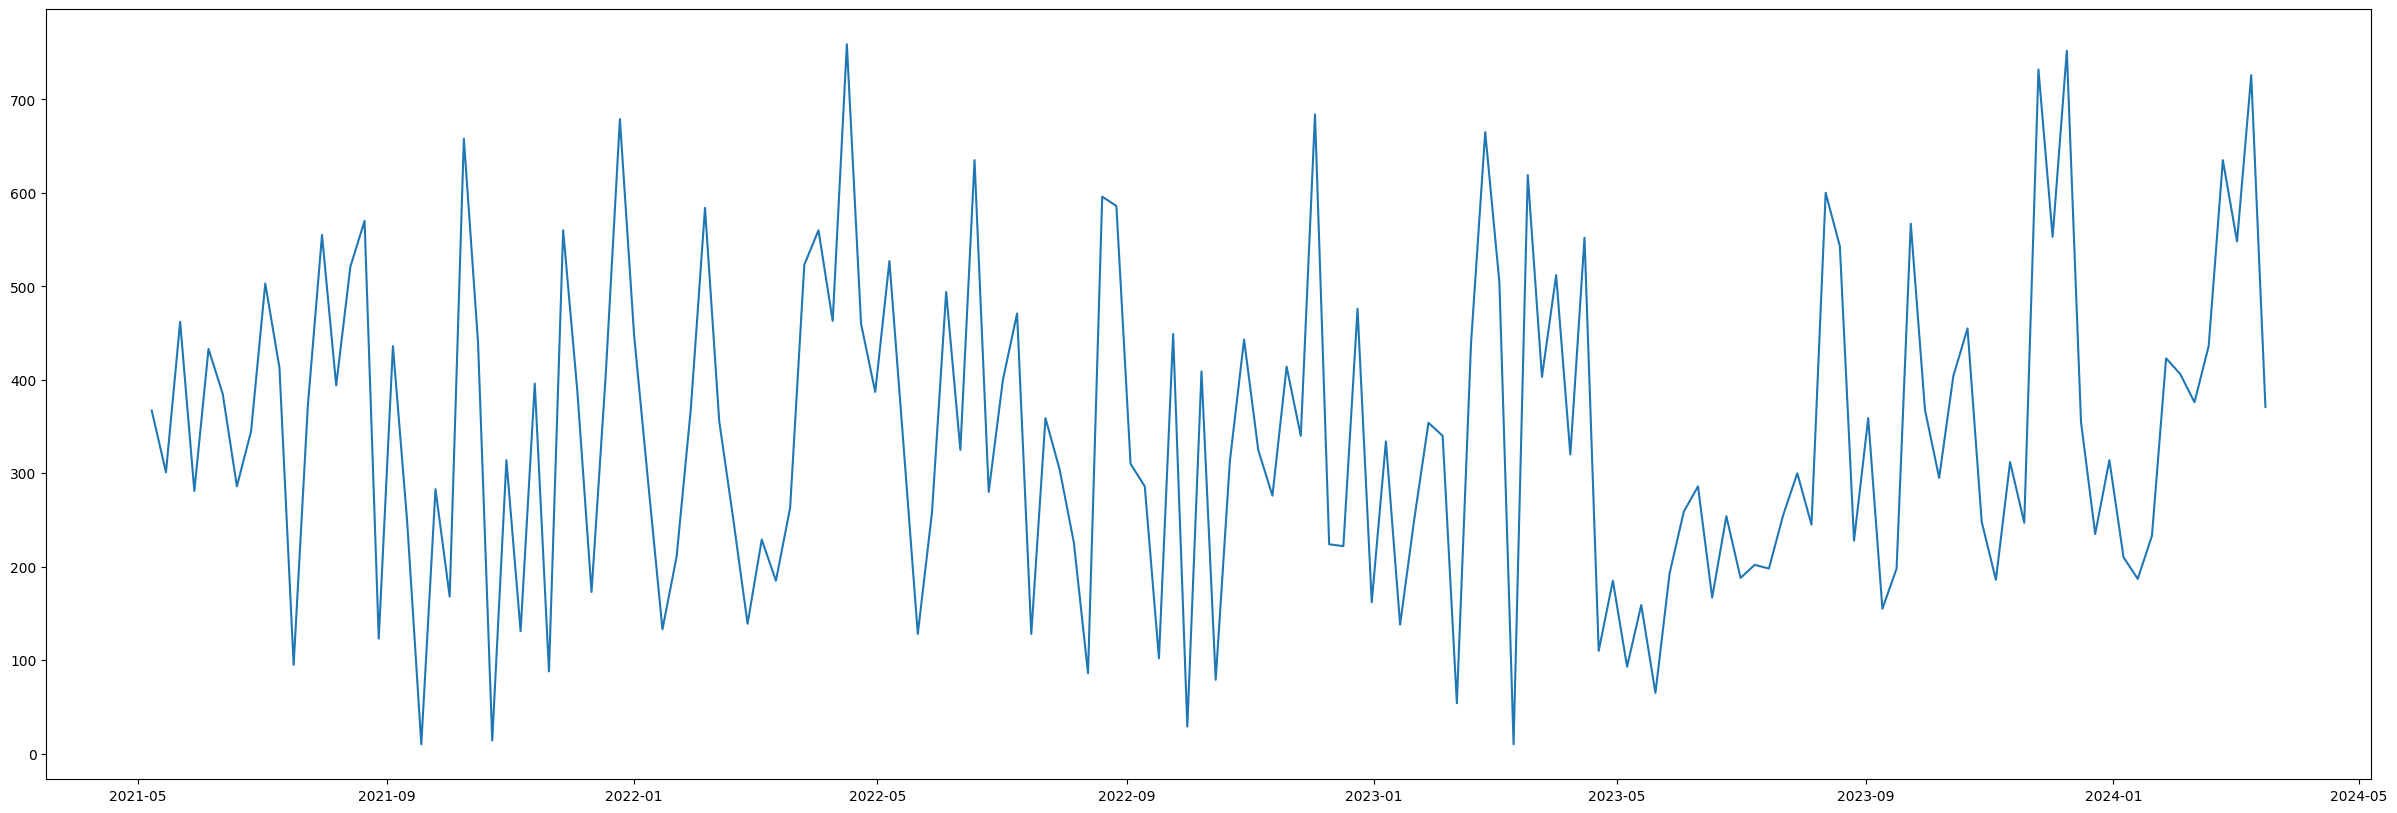

In [10]:
plt.figure(figsize=(30,10))

plt.plot(data['date'],data['data'])
plt.show()

In [11]:
#data=data[data['data']>120 ]
#data=data[data['data']<650 ]

In [12]:
time_seris=data['date']

In [13]:
time_1 = [pd.to_datetime(data['date']) for date in data['date']]
time_1= np.array([(date - pd.Timestamp("1970-01-01")) // pd.Timedelta('1s') for date in data['date']]).reshape(-1, 1)

In [14]:
len(time_1)

150

In [15]:
X_train=time_1[:120]
X_test=time_1[120:]
y_train=data['data'][:120]
y_test=data['data'][120:]

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(time_1, data['data'], )

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

In [18]:
reg=LinearRegression()

In [19]:
reg.fit(time_1,data['data'])

LinearRegression()

In [20]:
y_pred = reg.predict(time_1)

In [21]:
from sklearn.metrics import mean_absolute_error

In [22]:
mean_absolute_error(data['data'], y_pred)

139.78097616585427

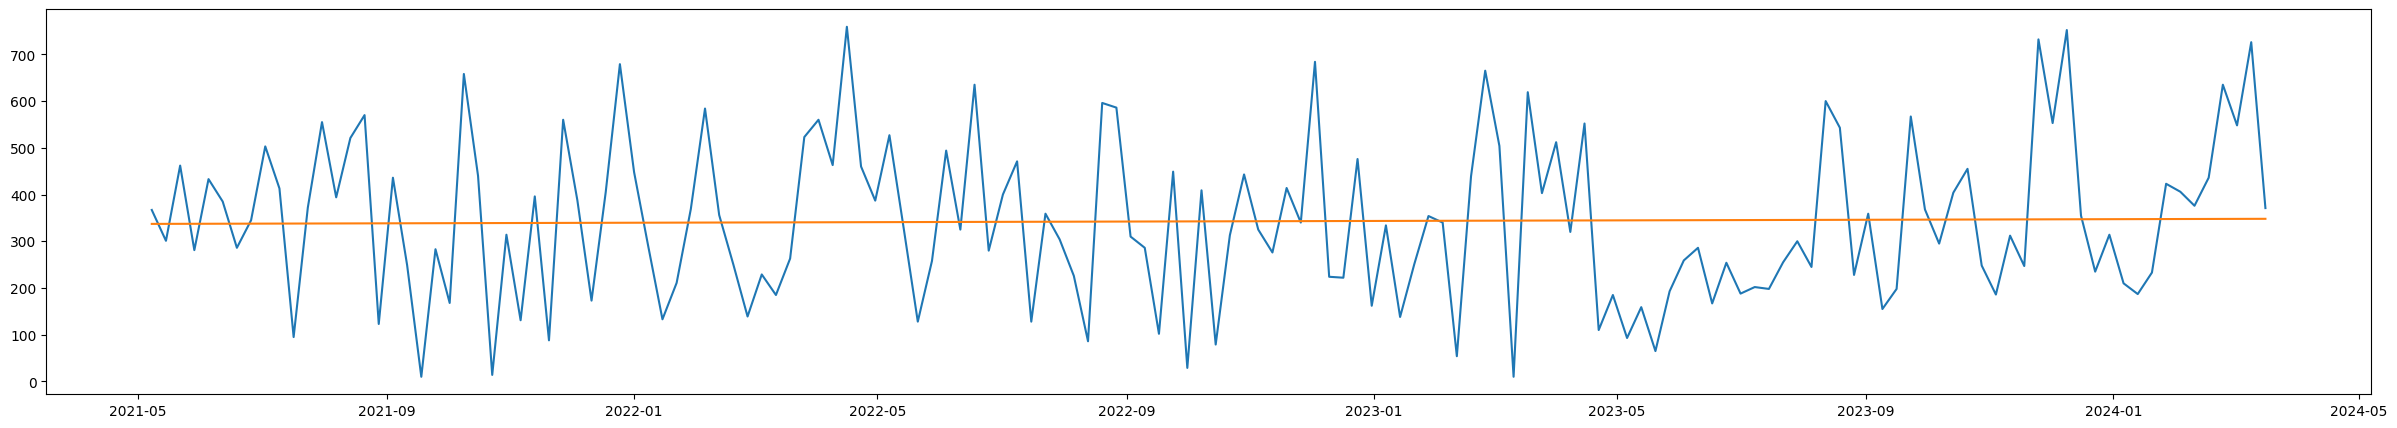

In [23]:
plt.figure(figsize=(30,5))
plt.plot(data['date'],data['data'])
plt.plot(data['date'],y_pred)
plt.show()

In [24]:
plt.figure(figsize=(30,5))
plt.plot(z,data['data'])
plt.plot(z,y_pred)
plt.show()

NameError: name 'z' is not defined

<Figure size 3000x500 with 0 Axes>

In [25]:
future_dates = ['2024-4-25T00:00:00.000000000','2024-5-25T00:00:00.000000000','2024-6-25T00:00:00.000000000','2024-7-25T00:00:00.000000000','2024-8-25T00:00:00.000000000','2024-9-25T00:00:00.000000000','2024-10-25T00:00:00.000000000','2024-11-25T00:00:00.000000000','2024-12-25T00:00:00.000000000',]
future_dates = [pd.to_datetime(date) for date in future_dates]
future_dates = np.array([(date - pd.Timestamp("1970-01-01")) // pd.Timedelta('1s') for date in future_dates]).reshape(-1, 1)


In [26]:
prdicted=reg.predict(future_dates)
prdicted

array([348.46231989, 348.7748214 , 349.09773962, 349.41024113,
       349.73315936, 350.05607758, 350.36857909, 350.69149732,
       351.00399882])

In [27]:
z=[*range(150)]

In [28]:
y_s=np.append(y_pred,prdicted)
s_y=[*range(159)]

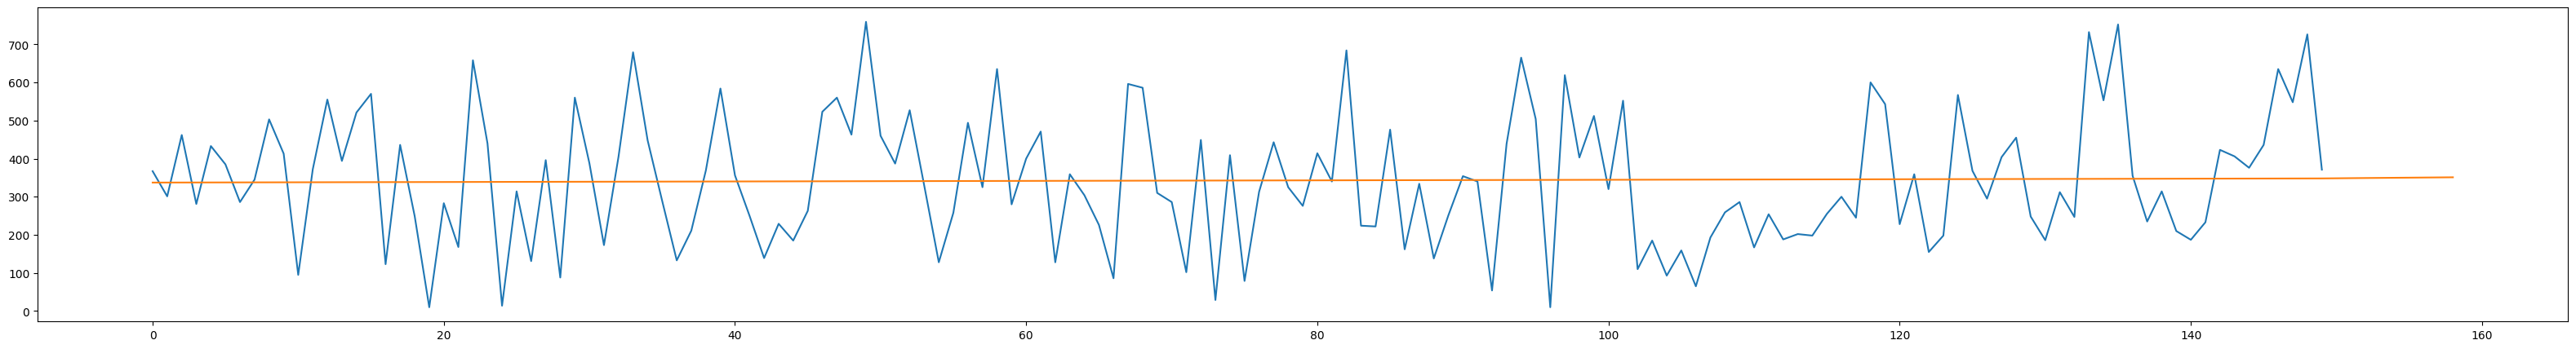

In [29]:
plt.figure(figsize=(40,5))
plt.plot(z,data['data'])
plt.plot(s_y,y_s)
plt.show()


اطلاعات ابتدایی از داده‌ها:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    150 non-null    datetime64[ns]
 1   data    52 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 2.5 KB
None

اولین سطرهای داده‌ها:
        date  data
0 2021-05-08   NaN
1 2021-05-15   NaN
2 2021-05-22   NaN
3 2021-05-29   NaN
4 2021-06-05   NaN

خلاصه آماری از داده‌ها:
count     52.000000
mean     338.519231
std      171.356467
min       65.000000
25%      201.000000
50%      297.500000
75%      426.250000
max      752.000000
Name: data, dtype: float64
count    150.000000
mean     343.720000
std      173.502998
min        5.000000
25%      207.750000
50%      322.500000
75%      459.000000
max      799.000000
Name: data, dtype: float64


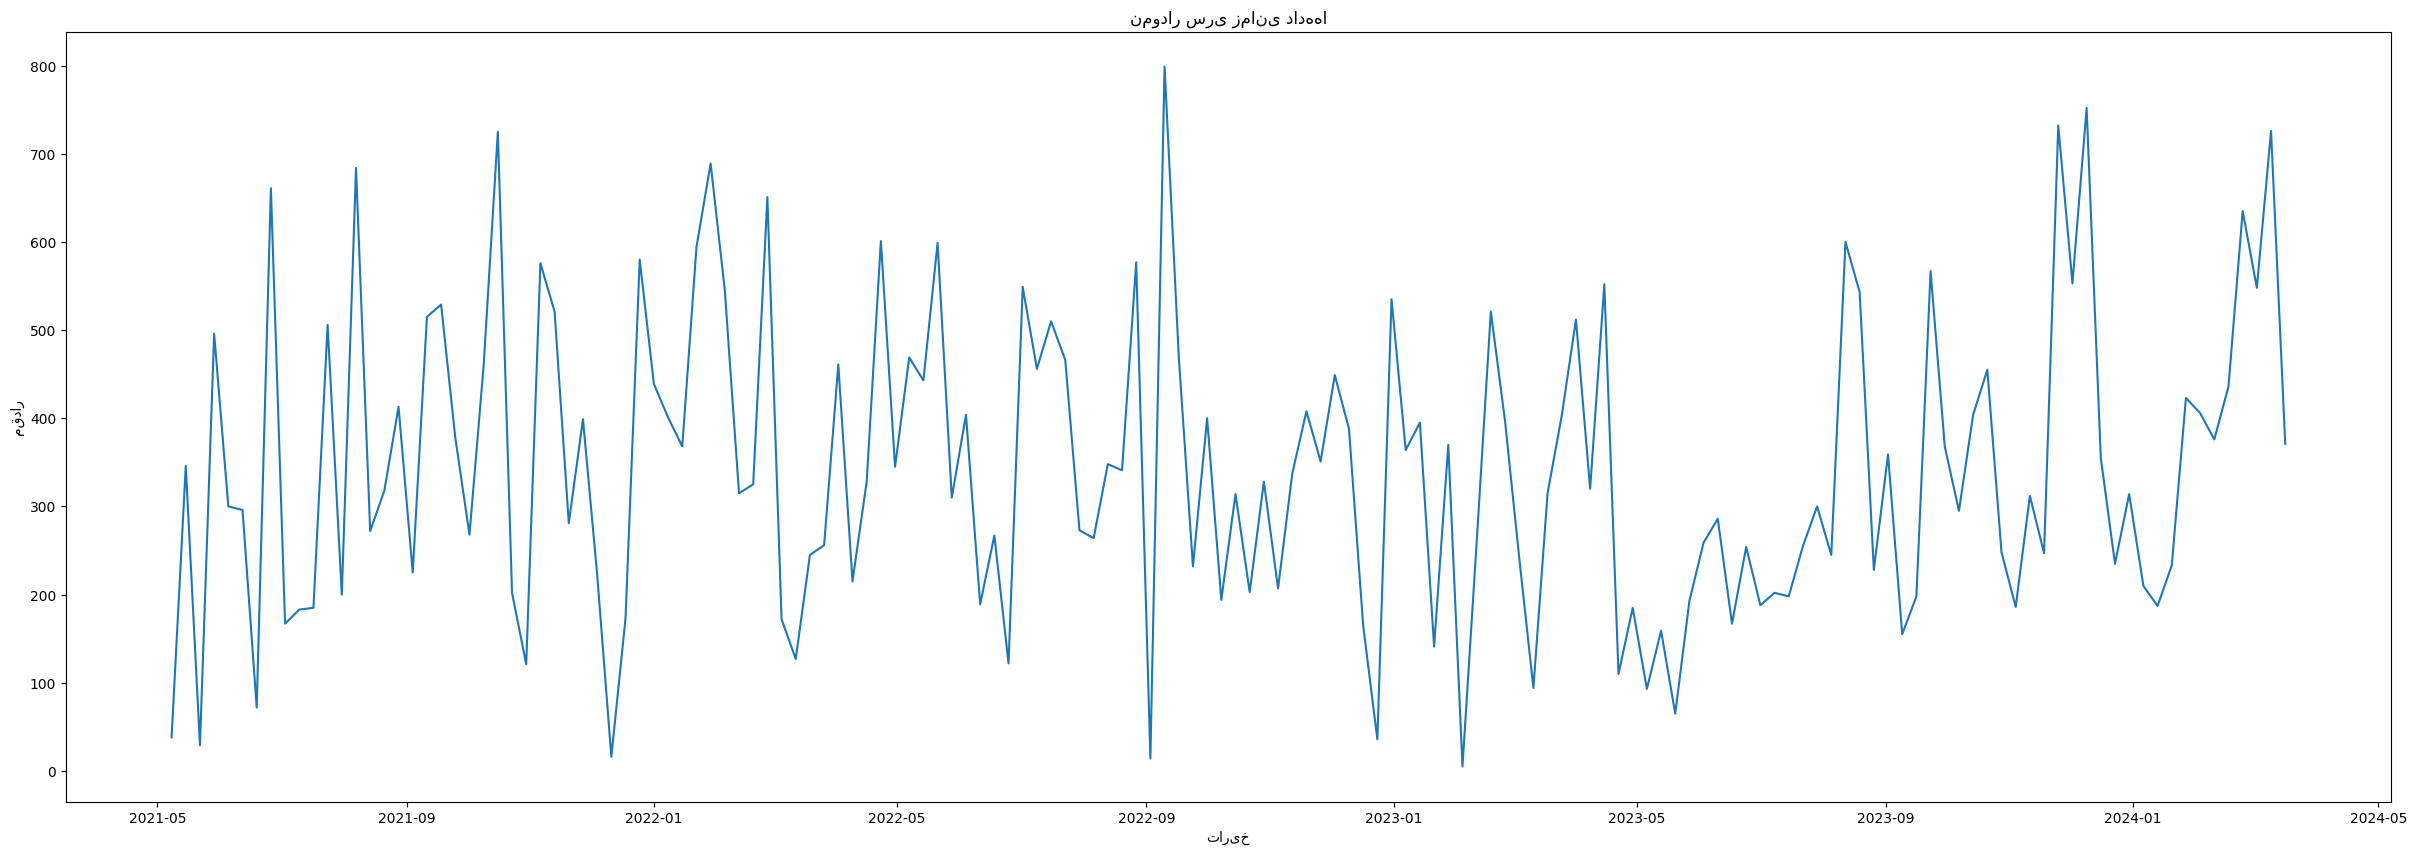

Mean Absolute Error: 141.50341727434773


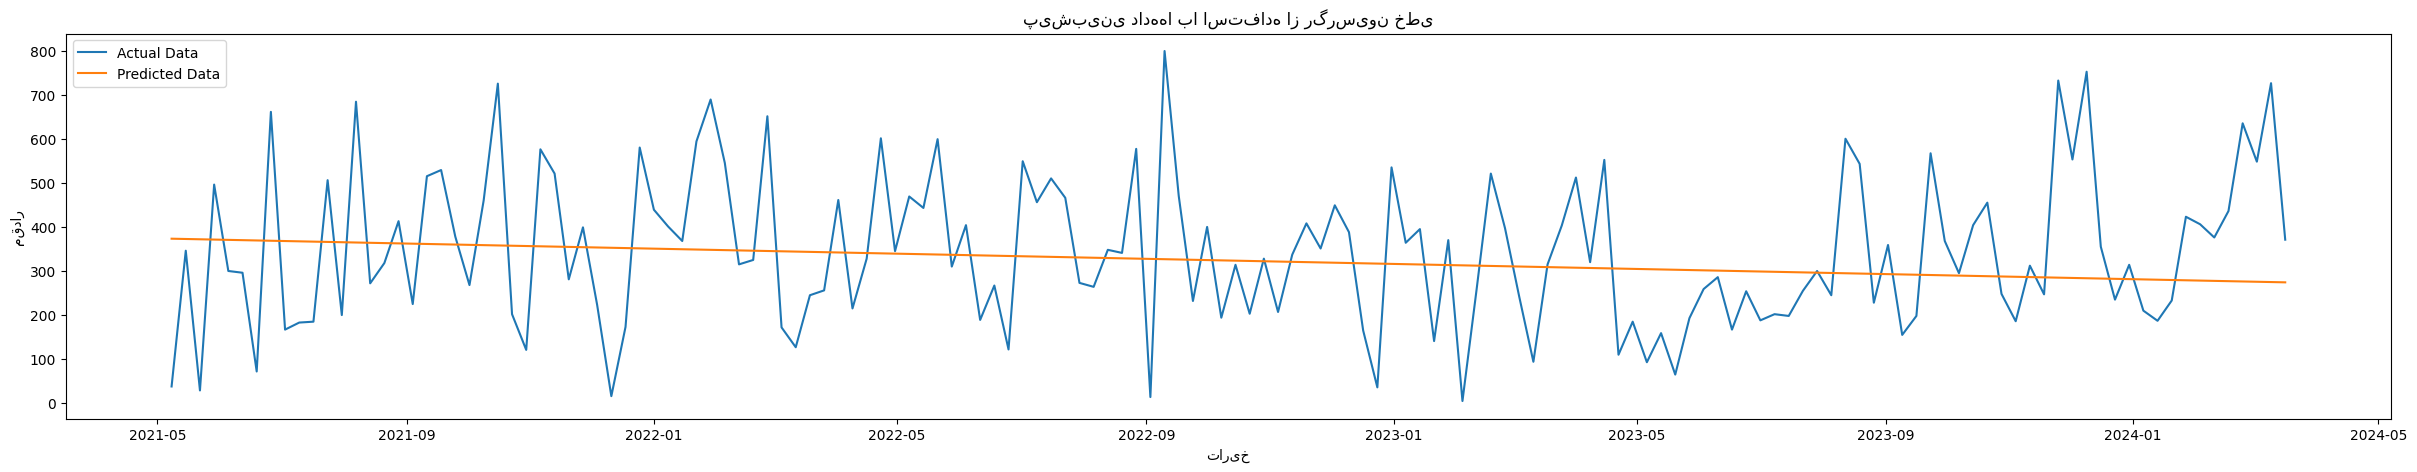

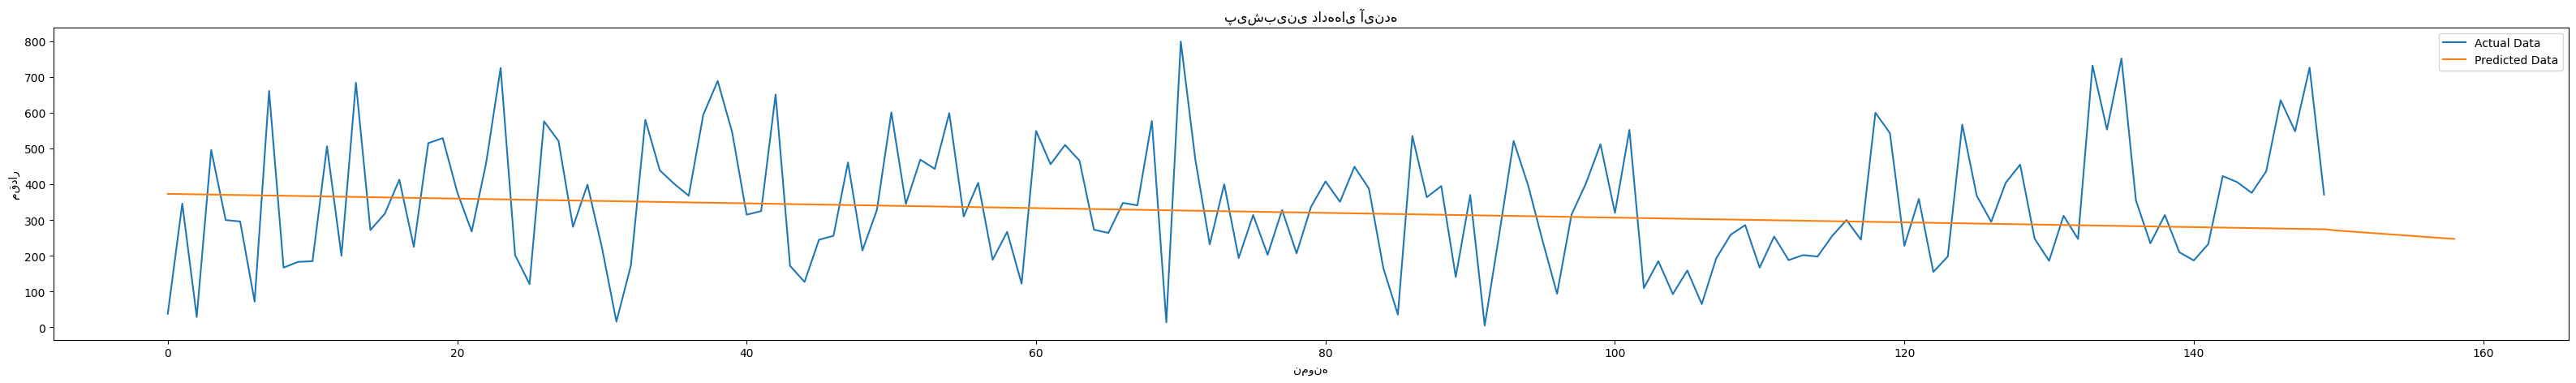

In [33]:
import pandas as pd
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

# بارگذاری داده‌ها از فایل اکسل
data = pd.read_excel('DATA 3.xlsx')

# نمایش اطلاعات ابتدایی از داده‌ها
print("اطلاعات ابتدایی از داده‌ها:")
print(data.info())

# نمایش اولین سطرهای داده‌ها
print("\nاولین سطرهای داده‌ها:")
print(data.head())

# نمایش خلاصه آماری از داده‌ها
print("\nخلاصه آماری از داده‌ها:")
print(data['data'].describe())

# تولید داده‌های نرمال و اضافه کردن به داده‌های اصلی
data_normal = stats.norm.rvs(size=98, loc=338.519231, scale=171.356467)
data_normal = [int(data) for data in data_normal]
data_normal = [abs(data) for data in data_normal]

da = np.array(data['data'])
da = da[~np.isnan(da)]
ds = np.append(data_normal, da)
data['data'] = ds

# نمایش توصیف داده‌ها پس از ترکیب
print(data['data'].describe())

# ترسیم نمودار داده‌ها
plt.figure(figsize=(30,10))
plt.plot(data['date'], data['data'])
plt.title('نمودار سری زمانی داده‌ها')
plt.xlabel('تاریخ')
plt.ylabel('مقدار')
plt.show()

# تبدیل تاریخ‌ها به فرمت عددی
time_1 = np.array([(pd.to_datetime(date) - pd.Timestamp("1970-01-01")) // pd.Timedelta('1s') for date in data['date']]).reshape(-1, 1)

# تقسیم‌بندی داده‌ها به دو بخش آموزش و تست (حفظ ترتیب زمانی)
X_train = time_1[:120]
X_test = time_1[120:]
y_train = data['data'][:120]
y_test = data['data'][120:]

# آموزش مدل رگرسیون خطی
reg = LinearRegression()
reg.fit(X_train, y_train)

# پیش‌بینی با استفاده از مدل آموزش دیده
y_pred = reg.predict(time_1)

# محاسبه خطای مطلق میانگین
mae = mean_absolute_error(data['data'], y_pred)
print(f'Mean Absolute Error: {mae}')

# ترسیم نتایج پیش‌بینی شده به همراه داده‌های واقعی
plt.figure(figsize=(30,5))
plt.plot(data['date'], data['data'], label='Actual Data')
plt.plot(data['date'], y_pred, label='Predicted Data')
plt.title('پیش‌بینی داده‌ها با استفاده از رگرسیون خطی')
plt.xlabel('تاریخ')
plt.ylabel('مقدار')
plt.legend()
plt.show()

# پیش‌بینی برای تاریخ‌های آینده
future_dates = ['2024-4-25', '2024-5-25', '2024-6-25', '2024-7-25', '2024-8-25', '2024-9-25', '2024-10-25', '2024-11-25', '2024-12-25']
future_dates = [pd.to_datetime(date) for date in future_dates]
future_dates = np.array([(date - pd.Timestamp("1970-01-01")) // pd.Timedelta('1s') for date in future_dates]).reshape(-1, 1)

predicted = reg.predict(future_dates)

# ترکیب داده‌های پیش‌بینی شده با داده‌های واقعی
z = [*range(len(time_1))]
y_s = np.append(y_pred, predicted)
s_y = [*range(len(y_s))]

# ترسیم نمودار نهایی
plt.figure(figsize=(40,5))
plt.plot(z, data['data'], label='Actual Data')
plt.plot(s_y, y_s, label='Predicted Data')
plt.title('پیش‌بینی داده‌های آینده')
plt.xlabel('نمونه')
plt.ylabel('مقدار')
plt.legend()
plt.show()

اطلاعات ابتدایی از داده‌ها:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    150 non-null    datetime64[ns]
 1   data    52 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 2.5 KB
None

اولین سطرهای داده‌ها:
        date  data
0 2021-05-08   NaN
1 2021-05-15   NaN
2 2021-05-22   NaN
3 2021-05-29   NaN
4 2021-06-05   NaN

خلاصه آماری از داده‌ها:
count     52.000000
mean     338.519231
std      171.356467
min       65.000000
25%      201.000000
50%      297.500000
75%      426.250000
max      752.000000
Name: data, dtype: float64
count    150.000000
mean     329.200000
std      155.902869
min        6.000000
25%      209.250000
50%      313.500000
75%      422.250000
max      752.000000
Name: data, dtype: float64


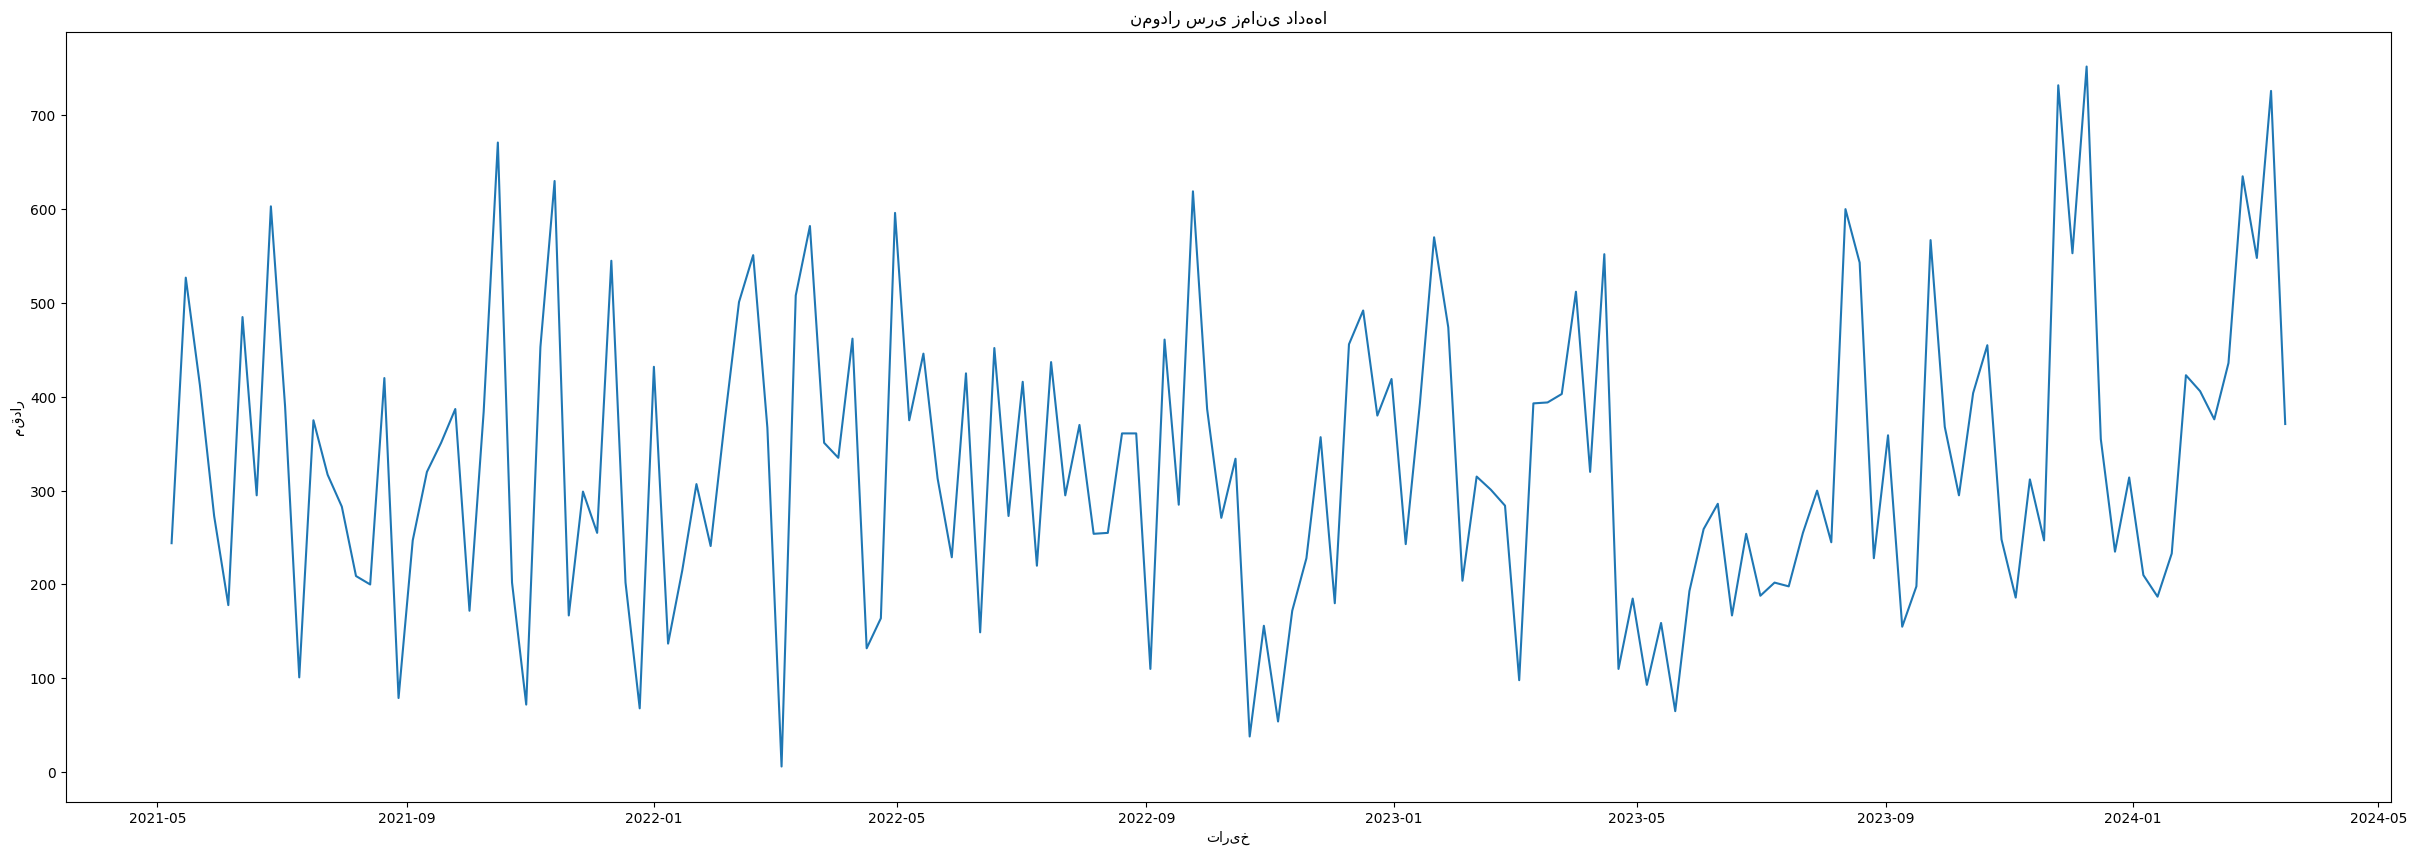

                               SARIMAX Results                                
Dep. Variable:                   data   No. Observations:                  120
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -772.491
Date:                Tue, 04 Jun 2024   AIC                           1556.982
Time:                        14:19:43   BIC                           1573.657
Sample:                             0   HQIC                          1563.753
                                - 120                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7487      0.104     -7.226      0.000      -0.952      -0.546
ar.L2         -0.6005      0.116     -5.172      0.000      -0.828      -0.373
ar.L3         -0.3440      0.140     -2.456      0.0

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


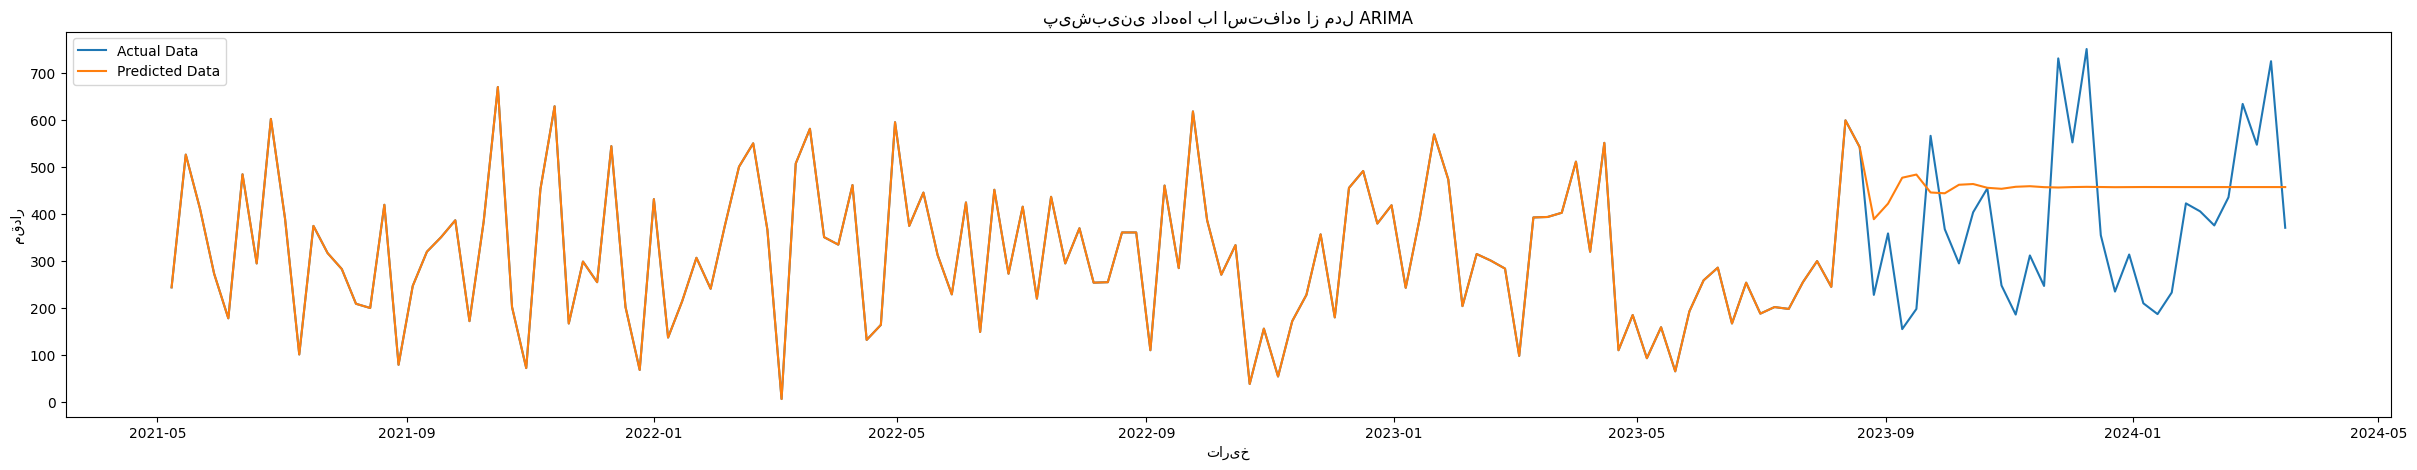

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


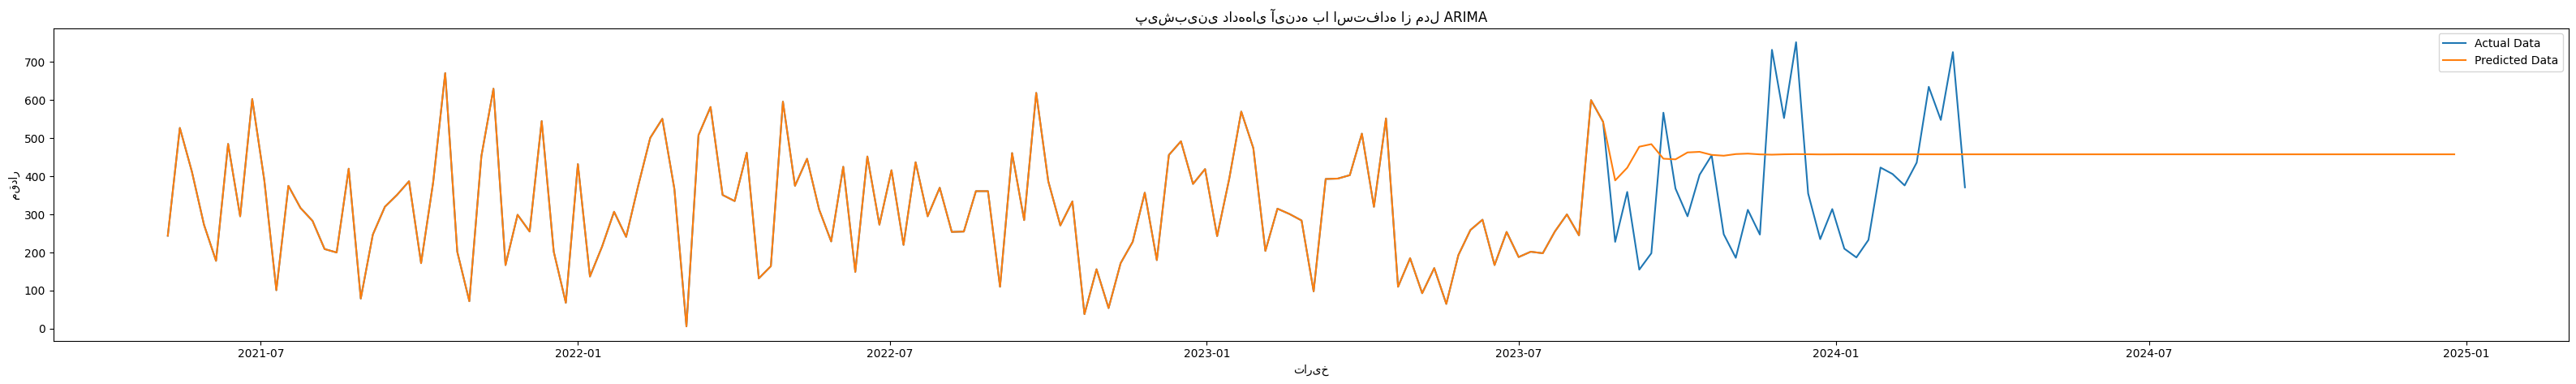

In [36]:
import pandas as pd
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error

# بارگذاری داده‌ها از فایل اکسل
data = pd.read_excel('/content/DATA 3.xlsx')

# نمایش اطلاعات ابتدایی از داده‌ها
print("اطلاعات ابتدایی از داده‌ها:")
print(data.info())

# نمایش اولین سطرهای داده‌ها
print("\nاولین سطرهای داده‌ها:")
print(data.head())

# نمایش خلاصه آماری از داده‌ها
print("\nخلاصه آماری از داده‌ها:")
print(data['data'].describe())

# تولید داده‌های نرمال و اضافه کردن به داده‌های اصلی
data_normal = stats.norm.rvs(size=98, loc=338.519231, scale=171.356467)
data_normal = [int(data) for data in data_normal]
data_normal = [abs(data) for data in data_normal]

da = np.array(data['data'])
da = da[~np.isnan(da)]
ds = np.append(data_normal, da)
data['data'] = ds

# نمایش توصیف داده‌ها پس از ترکیب
print(data['data'].describe())

# ترسیم نمودار داده‌ها
plt.figure(figsize=(30,10))
plt.plot(data['date'], data['data'])
plt.title('نمودار سری زمانی داده‌ها')
plt.xlabel('تاریخ')
plt.ylabel('مقدار')
plt.show()

# تقسیم داده‌ها به مجموعه‌های آموزش و تست
train_size = int(len(data) * 0.8)
train, test = data['data'][:train_size], data['data'][train_size:]

# آموزش مدل ARIMA
model = ARIMA(train, order=(5, 1, 0))
model_fit = model.fit()

# چاپ خلاصه مدل
print(model_fit.summary())

# پیش‌بینی با استفاده از مدل ARIMA
y_pred = model_fit.predict(start=len(train), end=len(train)+len(test)-1, typ='levels')
y_pred_full = np.concatenate([train, y_pred])

# محاسبه خطای مطلق میانگین و خطای میانگین مربعات
mae = mean_absolute_error(data['data'], y_pred_full)
mse = mean_squared_error(data['data'], y_pred_full)
print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {np.sqrt(mse)}')

# ترسیم نتایج پیش‌بینی شده به همراه داده‌های واقعی
plt.figure(figsize=(30,5))
plt.plot(data['date'], data['data'], label='Actual Data')
plt.plot(data['date'], y_pred_full, label='Predicted Data')
plt.title('پیش‌بینی داده‌ها با استفاده از مدل ARIMA')
plt.xlabel('تاریخ')
plt.ylabel('مقدار')
plt.legend()
plt.show()

# پیش‌بینی برای تاریخ‌های آینده
future_dates = ['2024-4-25', '2024-5-25', '2024-6-25', '2024-7-25', '2024-8-25', '2024-9-25', '2024-10-25', '2024-11-25', '2024-12-25']
future_dates = [pd.to_datetime(date) for date in future_dates]
future_dates_indices = np.array([(date - pd.Timestamp("1970-01-01")) // pd.Timedelta('1s') for date in future_dates])

# پیش‌بینی داده‌های آینده با استفاده از مدل ARIMA
future_pred = model_fit.predict(start=len(data), end=len(data)+len(future_dates)-1, typ='levels')

# ترکیب داده‌های پیش‌بینی شده با داده‌های واقعی
y_s = np.concatenate([y_pred_full, future_pred])
s_y = list(data['date']) + future_dates

# ترسیم نمودار نهایی
plt.figure(figsize=(40,5))
plt.plot(data['date'], data['data'], label='Actual Data')
plt.plot(s_y, y_s, label='Predicted Data')
plt.title('پیش‌بینی داده‌های آینده با استفاده از مدل ARIMA')
plt.xlabel('تاریخ')
plt.ylabel('مقدار')
plt.legend()
plt.show()

Initial data information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    150 non-null    datetime64[ns]
 1   data    52 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 2.5 KB
None

First rows of data:
        date  data
0 2021-05-08   NaN
1 2021-05-15   NaN
2 2021-05-22   NaN
3 2021-05-29   NaN
4 2021-06-05   NaN

Statistical summary of data:
count     52.000000
mean     338.519231
std      171.356467
min       65.000000
25%      201.000000
50%      297.500000
75%      426.250000
max      752.000000
Name: data, dtype: float64
count    150.000000
mean     331.653333
std      174.981302
min       10.000000
25%      198.000000
50%      314.000000
75%      440.500000
max      764.000000
Name: data, dtype: float64


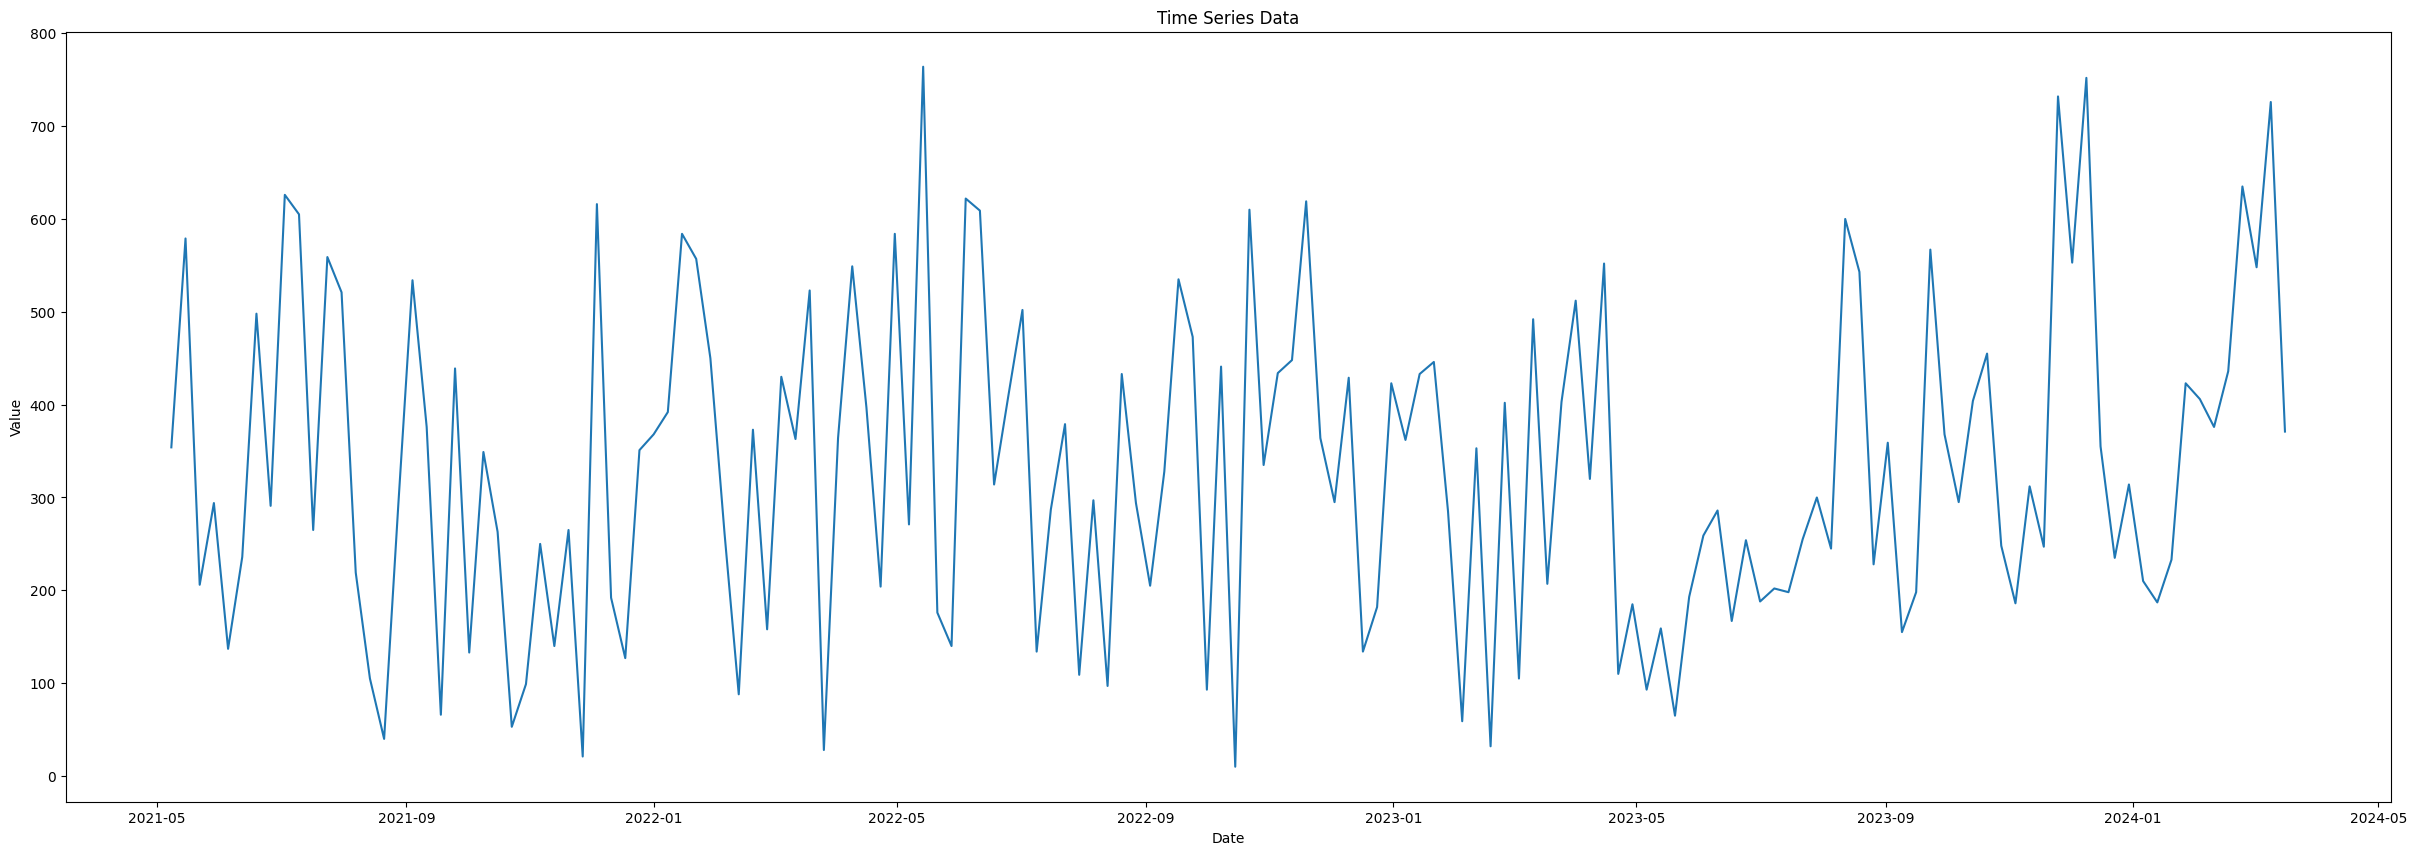

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


                                     SARIMAX Results                                      
Dep. Variable:                               data   No. Observations:                  120
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -721.366
Date:                            Tue, 04 Jun 2024   AIC                           1452.732
Time:                                    14:23:01   BIC                           1466.096
Sample:                                         0   HQIC                          1458.149
                                            - 120                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0405      0.115      0.352      0.725      -0.185       0.266
ma.L1         -0.9420      0.068   

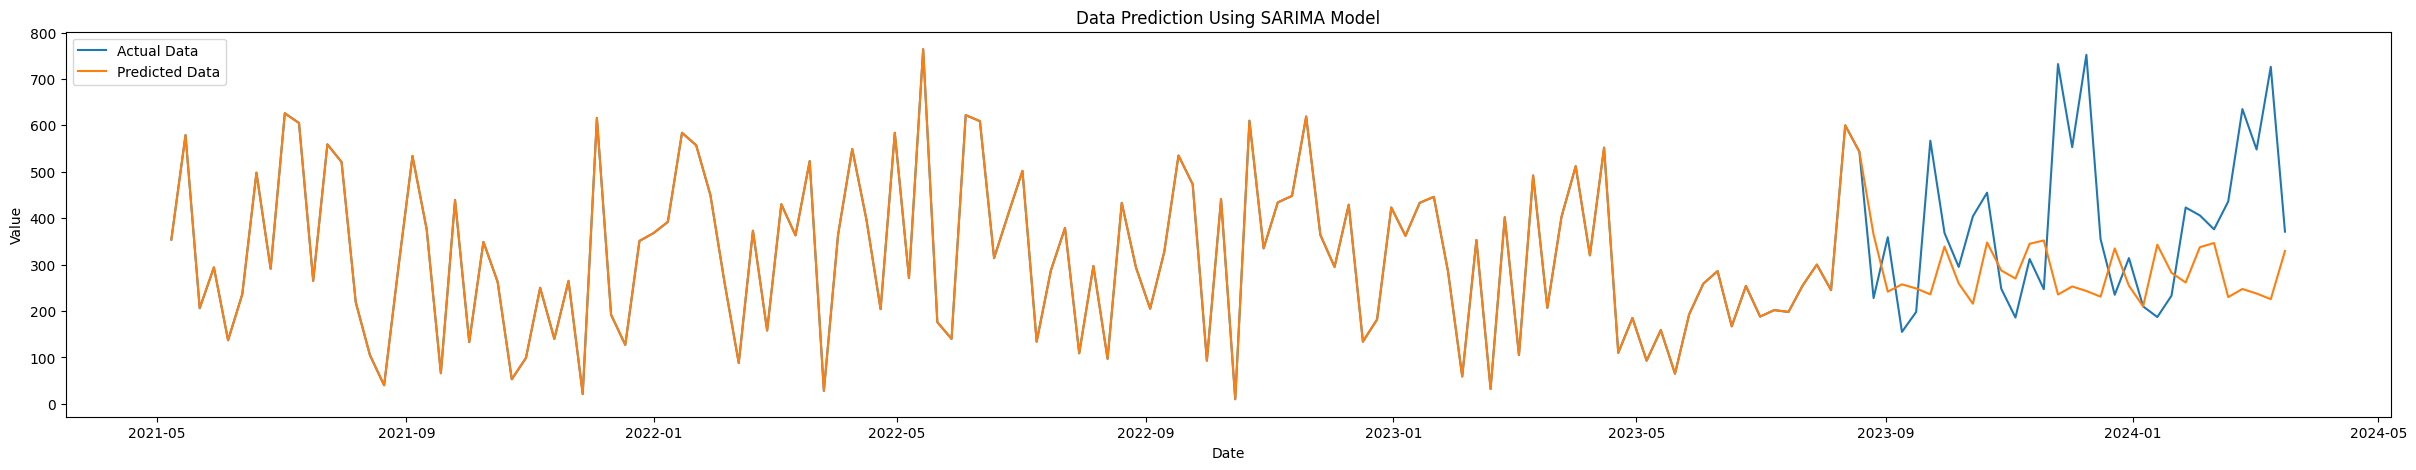

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


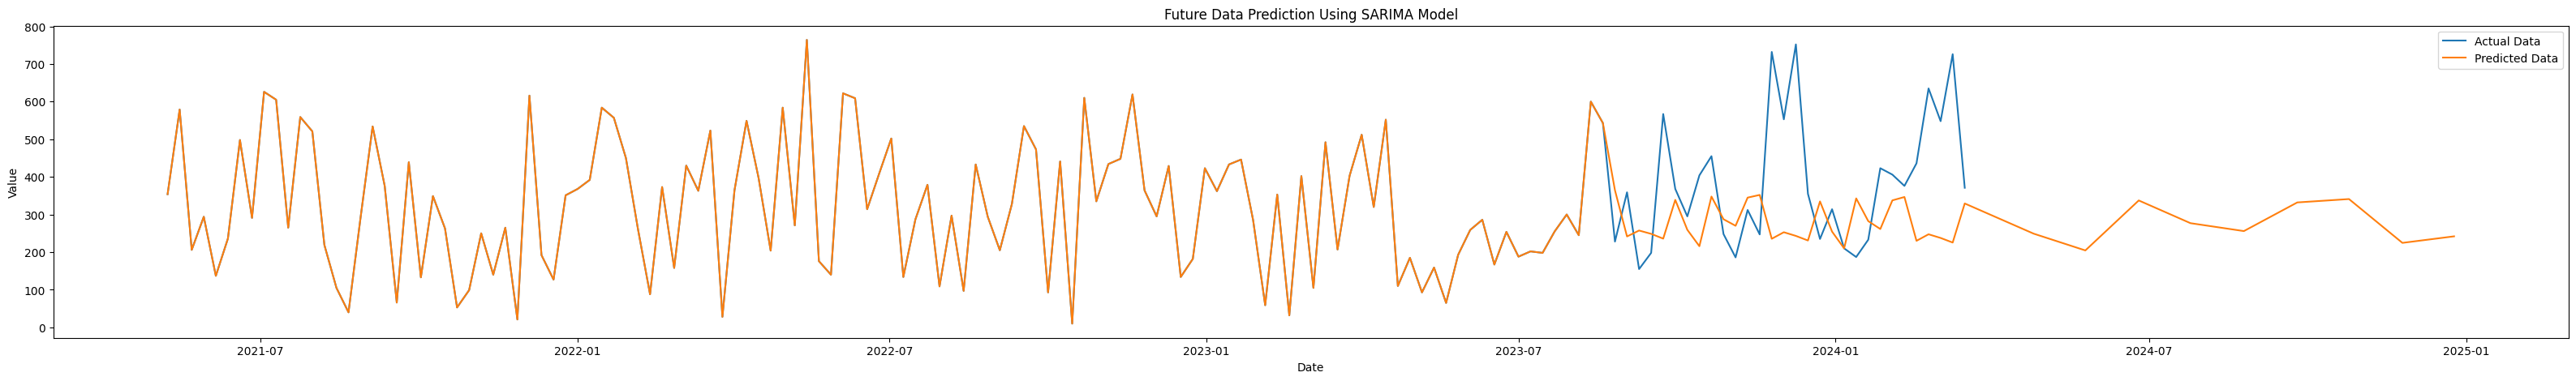

In [38]:
import pandas as pd
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error

# بارگذاری داده‌ها از فایل اکسل
data = pd.read_excel('/content/DATA 3.xlsx')

# نمایش اطلاعات ابتدایی از داده‌ها
print("Initial data information:")
print(data.info())

# نمایش اولین سطرهای داده‌ها
print("\nFirst rows of data:")
print(data.head())

# نمایش خلاصه آماری از داده‌ها
print("\nStatistical summary of data:")
print(data['data'].describe())

# تولید داده‌های نرمال و اضافه کردن به داده‌های اصلی
data_normal = stats.norm.rvs(size=98, loc=338.519231, scale=171.356467)
data_normal = [int(data) for data in data_normal]
data_normal = [abs(data) for data in data_normal]

da = np.array(data['data'])
da = da[~np.isnan(da)]
ds = np.append(data_normal, da)
data['data'] = ds

# نمایش توصیف داده‌ها پس از ترکیب
print(data['data'].describe())

# ترسیم نمودار داده‌ها
plt.figure(figsize=(30,10))
plt.plot(data['date'], data['data'])
plt.title('Time Series Data')
plt.xlabel('Date')
plt.ylabel('Value')
plt.show()

# تقسیم داده‌ها به مجموعه‌های آموزش و تست
train_size = int(len(data) * 0.8)
train, test = data['data'][:train_size], data['data'][train_size:]

# آموزش مدل SARIMA
model = SARIMAX(train, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
model_fit = model.fit(disp=False)

# چاپ خلاصه مدل
print(model_fit.summary())

# پیش‌بینی با استفاده از مدل SARIMA
y_pred = model_fit.predict(start=len(train), end=len(train)+len(test)-1, typ='levels')
y_pred_full = np.concatenate([train, y_pred])

# محاسبه خطای مطلق میانگین و خطای میانگین مربعات
mae = mean_absolute_error(data['data'], y_pred_full)
mse = mean_squared_error(data['data'], y_pred_full)
print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {np.sqrt(mse)}')

# ترسیم نتایج پیش‌بینی شده به همراه داده‌های واقعی
plt.figure(figsize=(30,5))
plt.plot(data['date'], data['data'], label='Actual Data')
plt.plot(data['date'], y_pred_full, label='Predicted Data')
plt.title('Data Prediction Using SARIMA Model')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

# پیش‌بینی برای تاریخ‌های آینده
future_dates = ['2024-4-25', '2024-5-25', '2024-6-25', '2024-7-25', '2024-8-25', '2024-9-25', '2024-10-25', '2024-11-25', '2024-12-25']
future_dates = [pd.to_datetime(date) for date in future_dates]
future_dates_indices = np.array([(date - pd.Timestamp("1970-01-01")) // pd.Timedelta('1s') for date in future_dates])

# پیش‌بینی داده‌های آینده با استفاده از مدل SARIMA
future_pred = model_fit.predict(start=len(data), end=len(data)+len(future_dates)-1, typ='levels')

# ترکیب داده‌های پیش‌بینی شده با داده‌های واقعی
y_s = np.concatenate([y_pred_full, future_pred])
s_y = list(data['date']) + future_dates

# ترسیم نمودار نهایی
plt.figure(figsize=(40,5))
plt.plot(data['date'], data['data'], label='Actual Data')
plt.plot(s_y, y_s, label='Predicted Data')
plt.title('Future Data Prediction Using SARIMA Model')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

Initial data information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    150 non-null    datetime64[ns]
 1   data    52 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 2.5 KB
None

First rows of data:
        date  data
0 2021-05-08   NaN
1 2021-05-15   NaN
2 2021-05-22   NaN
3 2021-05-29   NaN
4 2021-06-05   NaN

Statistical summary of data:
count     52.000000
mean     338.519231
std      171.356467
min       65.000000
25%      201.000000
50%      297.500000
75%      426.250000
max      752.000000
Name: data, dtype: float64
count    150.000000
mean     338.833333
std      171.681007
min        6.000000
25%      224.250000
50%      317.000000
75%      440.500000
max      753.000000
Name: data, dtype: float64
Epoch 1/50
109/109 [==============================] - 8s 8ms/step - loss: 0.0675
Epoch 2/50

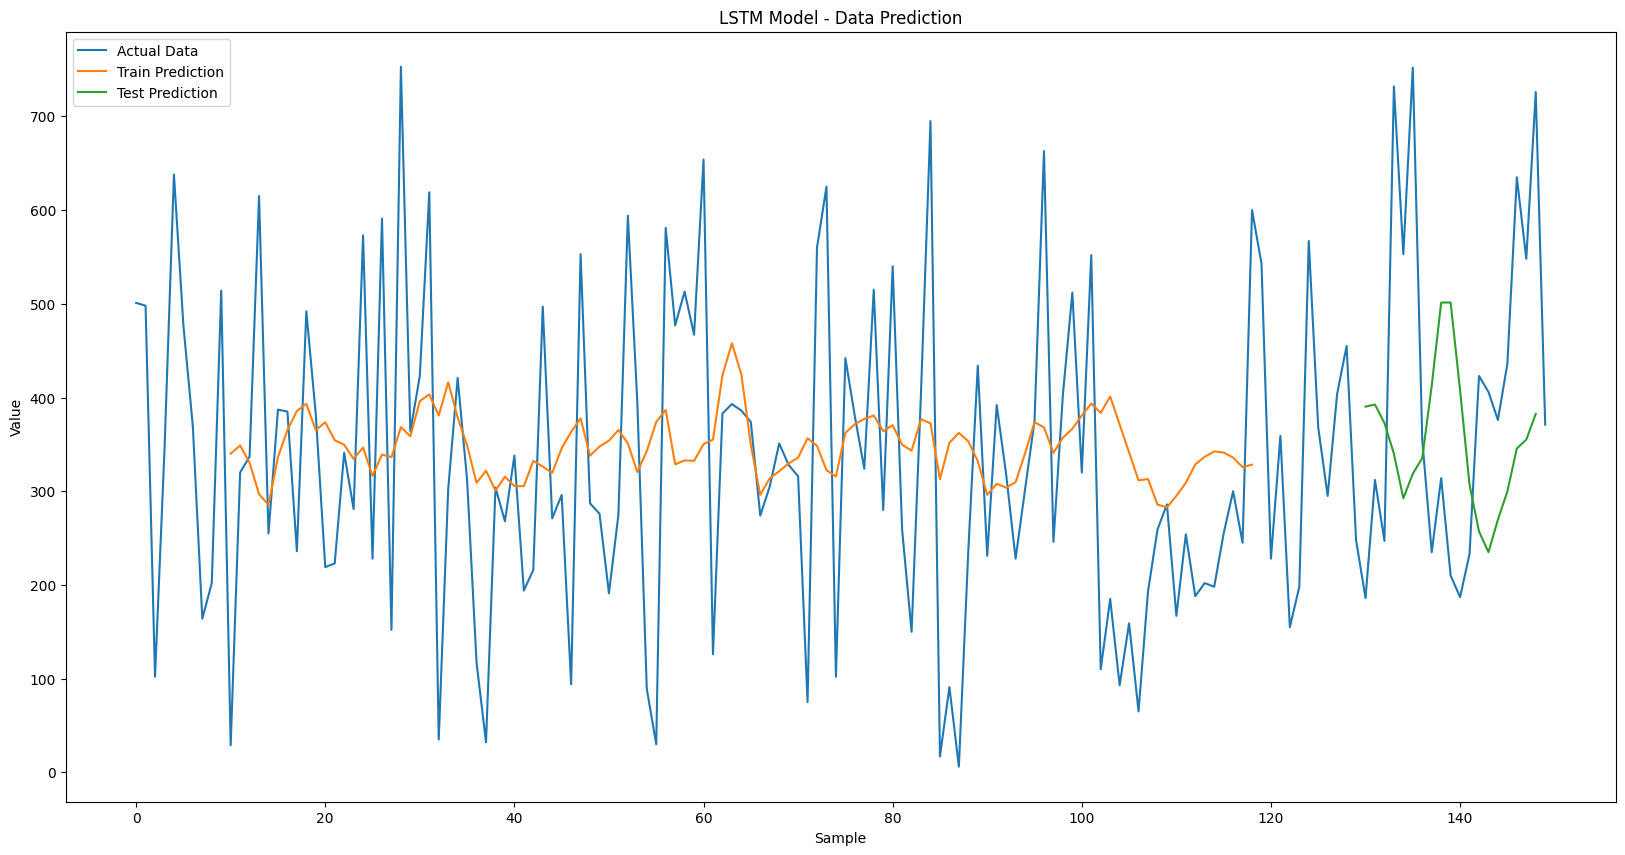

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.metrics import mean_absolute_error, mean_squared_error

# بارگذاری داده‌ها از فایل اکسل
data = pd.read_excel('DATA 3.xlsx')

# نمایش اطلاعات ابتدایی از داده‌ها
print("Initial data information:")
print(data.info())

# نمایش اولین سطرهای داده‌ها
print("\nFirst rows of data:")
print(data.head())

# نمایش خلاصه آماری از داده‌ها
print("\nStatistical summary of data:")
print(data['data'].describe())

# تولید داده‌های نرمال و اضافه کردن به داده‌های اصلی
data_normal = stats.norm.rvs(size=98, loc=338.519231, scale=171.356467)
data_normal = [int(data) for data in data_normal]
data_normal = [abs(data) for data in data_normal]

da = np.array(data['data'])
da = da[~np.isnan(da)]
ds = np.append(data_normal, da)
data['data'] = ds

# نمایش توصیف داده‌ها پس از ترکیب
print(data['data'].describe())

# نرمال‌سازی داده‌ها
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data['data'].values.reshape(-1, 1))

# تقسیم داده‌ها به مجموعه‌های آموزش و تست
train_size = int(len(scaled_data) * 0.8)
train_data, test_data = scaled_data[:train_size], scaled_data[train_size:]

# ایجاد داده‌های ورودی برای مدل LSTM
def create_dataset(data, time_step=1):
    X, Y = [], []
    for i in range(len(data) - time_step - 1):
        a = data[i:(i + time_step), 0]
        X.append(a)
        Y.append(data[i + time_step, 0])
    return np.array(X), np.array(Y)

time_step = 10
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

# تغییر شکل ورودی‌ها برای مدل LSTM [نمونه‌ها, زمان‌پله‌ها, ویژگی‌ها]
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# ساخت مدل LSTM
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(time_step, 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=50, batch_size=1, verbose=1)

# پیش‌بینی با استفاده از مدل LSTM
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# بازگرداندن مقادیر به مقیاس اصلی
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
y_train = scaler.inverse_transform(y_train.reshape(-1, 1))
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

# محاسبه خطاهای مدل
mae_train = mean_absolute_error(y_train, train_predict)
mse_train = mean_squared_error(y_train, train_predict)
rmse_train = np.sqrt(mse_train)

mae_test = mean_absolute_error(y_test, test_predict)
mse_test = mean_squared_error(y_test, test_predict)
rmse_test = np.sqrt(mse_test)

print(f'Train Mean Absolute Error: {mae_train}')
print(f'Train Mean Squared Error: {mse_train}')
print(f'Train Root Mean Squared Error: {rmse_train}')

print(f'Test Mean Absolute Error: {mae_test}')
print(f'Test Mean Squared Error: {mse_test}')
print(f'Test Root Mean Squared Error: {rmse_test}')

# ترسیم نمودار نتایج پیش‌بینی شده به همراه داده‌های واقعی
train_plot = np.empty_like(scaled_data)
train_plot[:, :] = np.nan
train_plot[time_step:len(train_predict) + time_step, :] = train_predict

test_plot = np.empty_like(scaled_data)
test_plot[:, :] = np.nan
test_plot[len(train_predict) + (time_step * 2) + 1:len(scaled_data) - 1, :] = test_predict

plt.figure(figsize=(20, 10))
plt.plot(scaler.inverse_transform(scaled_data), label='Actual Data')
plt.plot(train_plot, label='Train Prediction')
plt.plot(test_plot, label='Test Prediction')
plt.title('LSTM Model - Data Prediction')
plt.xlabel('Sample')
plt.ylabel('Value')
plt.legend()
plt.show()

In [6]:
!pip install keras scikit-learn

In [7]:
!pip install keras scikit-learn

In [13]:
!pip install tensorflow

In [14]:
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor

ModuleNotFoundError: No module named 'tensorflow.keras.wrappers'

In [15]:
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor

ModuleNotFoundError: No module named 'tensorflow.keras.wrappers'

Initial data information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    150 non-null    datetime64[ns]
 1   data    52 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 2.5 KB
None

First rows of data:
        date  data
0 2021-05-08   NaN
1 2021-05-15   NaN
2 2021-05-22   NaN
3 2021-05-29   NaN
4 2021-06-05   NaN

Statistical summary of data:
count     52.000000
mean     338.519231
std      171.356467
min       65.000000
25%      201.000000
50%      297.500000
75%      426.250000
max      752.000000
Name: data, dtype: float64
count    150.000000
mean     342.786667
std      160.609811
min       11.000000
25%      233.500000
50%      342.000000
75%      448.500000
max      752.000000
Name: data, dtype: float64
Epoch 1/50
109/109 [==============================] - 11s 15ms/step - loss: 0.0505
Epoch 2/

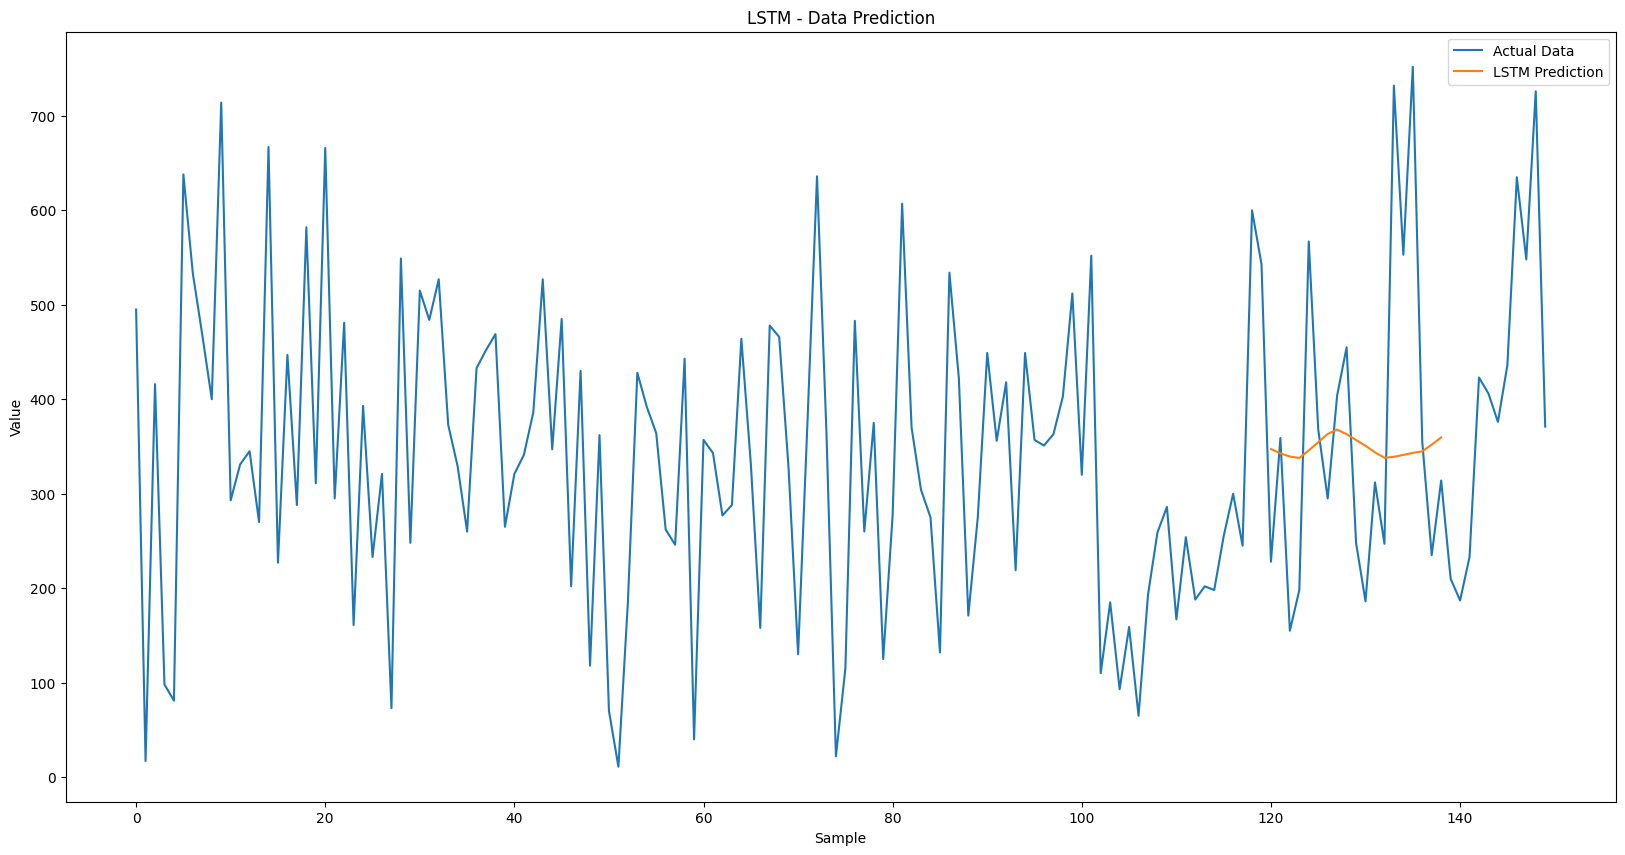

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from keras.models import Sequential
from keras.layers import LSTM, Dense

# بارگذاری داده‌ها از فایل اکسل
data = pd.read_excel('DATA 3.xlsx')

# نمایش اطلاعات ابتدایی از داده‌ها
print("Initial data information:")
print(data.info())

# نمایش اولین سطرهای داده‌ها
print("\nFirst rows of data:")
print(data.head())

# نمایش خلاصه آماری از داده‌ها
print("\nStatistical summary of data:")
print(data['data'].describe())

# تولید داده‌های نرمال و اضافه کردن به داده‌های اصلی
data_normal = stats.norm.rvs(size=98, loc=338.519231, scale=171.356467)
data_normal = [int(data) for data in data_normal]
data_normal = [abs(data) for data in data_normal]

da = np.array(data['data'])
da = da[~np.isnan(da)]
ds = np.append(data_normal, da)
data['data'] = ds

# نمایش توصیف داده‌ها پس از ترکیب
print(data['data'].describe())

# نرمال‌سازی داده‌ها
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data['data'].values.reshape(-1, 1))

# تقسیم داده‌ها به مجموعه‌های آموزش و تست
train_size = int(len(scaled_data) * 0.8)
train_data, test_data = scaled_data[:train_size], scaled_data[train_size:]

# ایجاد داده‌های ورودی برای مدل LSTM
def create_dataset(data, time_step=1):
    X, Y = [], []
    for i in range(len(data) - time_step - 1):
        a = data[i:(i + time_step), 0]
        X.append(a)
        Y.append(data[i + time_step, 0])
    return np.array(X), np.array(Y)

time_step = 10
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

# تغییر شکل ورودی‌ها برای مدل LSTM [نمونه‌ها، زمان‌پله‌ها، ویژگی‌ها]
X_train_lstm = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_lstm = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# ساخت مدل LSTM
model_lstm = Sequential()
model_lstm.add(LSTM(50, return_sequences=True, input_shape=(time_step, 1)))
model_lstm.add(LSTM(50, return_sequences=False))
model_lstm.add(Dense(1))
model_lstm.compile(optimizer='adam', loss='mean_squared_error')
model_lstm.fit(X_train_lstm, y_train, epochs=50, batch_size=1, verbose=1)

# پیش‌بینی با استفاده از مدل LSTM
train_predict_lstm = model_lstm.predict(X_train_lstm)
test_predict_lstm = model_lstm.predict(X_test_lstm)

# بازگرداندن مقادیر به مقیاس اصلی
train_predict_lstm = scaler.inverse_transform(train_predict_lstm)
test_predict_lstm = scaler.inverse_transform(test_predict_lstm)
y_train_inv = scaler.inverse_transform(y_train.reshape(-1, 1))
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))

# محاسبه خطاهای مدل LSTM
mae_train_lstm = mean_absolute_error(y_train_inv, train_predict_lstm)
mse_train_lstm = mean_squared_error(y_train_inv, train_predict_lstm)
rmse_train_lstm = np.sqrt(mse_train_lstm)

mae_test_lstm = mean_absolute_error(y_test_inv, test_predict_lstm)
mse_test_lstm = mean_squared_error(y_test_inv, test_predict_lstm)
rmse_test_lstm = np.sqrt(mse_test_lstm)

# مدل‌های دیگر
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree Regressor': DecisionTreeRegressor(),
    'Random Forest Regressor': RandomForestRegressor(),
    'Support Vector Regressor': SVR(),
    'K-Nearest Neighbors Regressor': KNeighborsRegressor(),
    'Gradient Boosting Regressor': GradientBoostingRegressor()
}

results = {}

for name, model in models.items():
    X_train_flat = X_train.reshape(X_train.shape[0], -1)
    X_test_flat = X_test.reshape(X_test.shape[0], -1)
    model.fit(X_train_flat, y_train)
    y_pred_train = model.predict(X_train_flat)
    y_pred_test = model.predict(X_test_flat)

    y_pred_train = scaler.inverse_transform(y_pred_train.reshape(-1, 1))
    y_pred_test = scaler.inverse_transform(y_pred_test.reshape(-1, 1))

    mae_train = mean_absolute_error(y_train_inv, y_pred_train)
    mse_train = mean_squared_error(y_train_inv, y_pred_train)
    rmse_train = np.sqrt(mse_train)

    mae_test = mean_absolute_error(y_test_inv, y_pred_test)
    mse_test = mean_squared_error(y_test_inv, y_pred_test)
    rmse_test = np.sqrt(mse_test)

    results[name] = {
        'Train MAE': mae_train,
        'Train MSE': mse_train,
        'Train RMSE': rmse_train,
        'Test MAE': mae_test,
        'Test MSE': mse_test,
        'Test RMSE': rmse_test
    }

# افزودن نتایج مدل LSTM به نتایج دیگر مدل‌ها
results['LSTM'] = {
    'Train MAE': mae_train_lstm,
    'Train MSE': mse_train_lstm,
    'Train RMSE': rmse_train_lstm,
    'Test MAE': mae_test_lstm,
    'Test MSE': mse_test_lstm,
    'Test RMSE': rmse_test_lstm
}

# نمایش نتایج
for name, metrics in results.items():
    print(f"\n{name}:")
    for metric_name, value in metrics.items():
        print(f"{metric_name}: {value}")

# ترسیم نمودار نتایج پیش‌بینی شده برای بهترین مدل (به عنوان مثال LSTM)
best_model_name = 'LSTM'
y_pred_test = test_predict_lstm

plt.figure(figsize=(20, 10))
plt.plot(scaler.inverse_transform(scaled_data), label='Actual Data')
plt.plot(np.arange(len(train_data), len(train_data) + len(y_pred_test)), y_pred_test, label=f'{best_model_name} Prediction')
plt.title(f'{best_model_name} - Data Prediction')
plt.xlabel('Sample')
plt.ylabel('Value')
plt.legend()
plt.show()

Initial data information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    150 non-null    datetime64[ns]
 1   data    52 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 2.5 KB
None

First rows of data:
        date  data
0 2021-05-08   NaN
1 2021-05-15   NaN
2 2021-05-22   NaN
3 2021-05-29   NaN
4 2021-06-05   NaN

Statistical summary of data:
count     52.000000
mean     338.519231
std      171.356467
min       65.000000
25%      201.000000
50%      297.500000
75%      426.250000
max      752.000000
Name: data, dtype: float64
count    150.000000
mean     330.153333
std      161.058943
min       10.000000
25%      220.750000
50%      309.500000
75%      416.250000
max      752.000000
Name: data, dtype: float64
Epoch 1/50
109/109 [==============================] - 7s 15ms/step - loss: 0.0574
Epoch 2/5

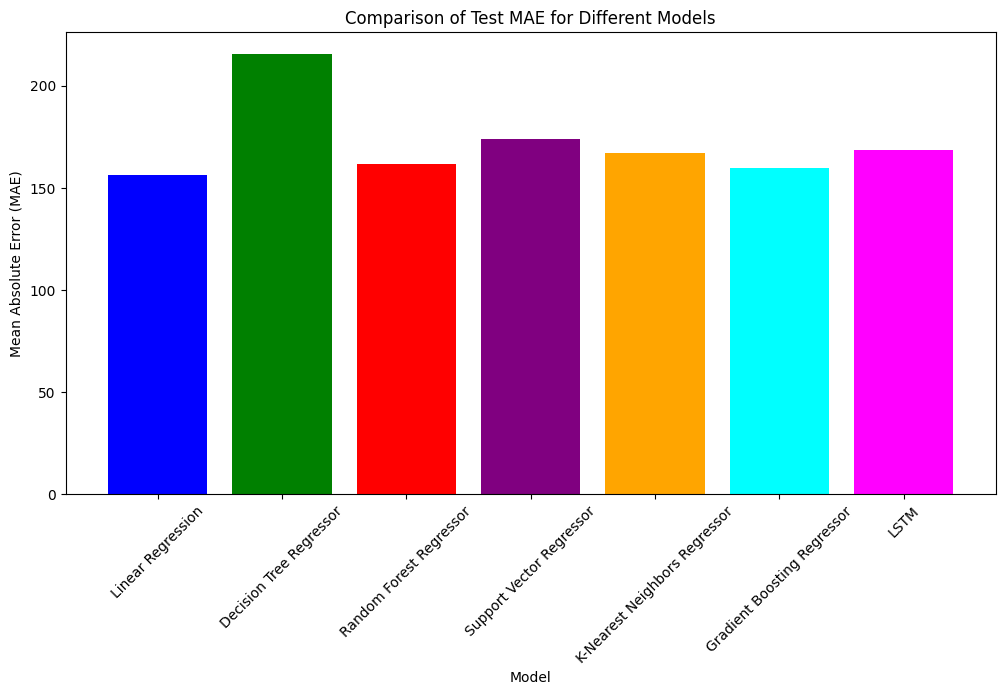

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from keras.models import Sequential
from keras.layers import LSTM, Dense

# بارگذاری داده‌ها از فایل اکسل
data = pd.read_excel('/content/DATA 3.xlsx')

# نمایش اطلاعات ابتدایی از داده‌ها
print("Initial data information:")
print(data.info())

# نمایش اولین سطرهای داده‌ها
print("\nFirst rows of data:")
print(data.head())

# نمایش خلاصه آماری از داده‌ها
print("\nStatistical summary of data:")
print(data['data'].describe())

# تولید داده‌های نرمال و اضافه کردن به داده‌های اصلی
data_normal = stats.norm.rvs(size=98, loc=338.519231, scale=171.356467)
data_normal = [int(data) for data in data_normal]
data_normal = [abs(data) for data in data_normal]

da = np.array(data['data'])
da = da[~np.isnan(da)]
ds = np.append(data_normal, da)
data['data'] = ds

# نمایش توصیف داده‌ها پس از ترکیب
print(data['data'].describe())

# نرمال‌سازی داده‌ها
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data['data'].values.reshape(-1, 1))

# تقسیم داده‌ها به مجموعه‌های آموزش و تست
train_size = int(len(scaled_data) * 0.8)
train_data, test_data = scaled_data[:train_size], scaled_data[train_size:]

# ایجاد داده‌های ورودی برای مدل LSTM
def create_dataset(data, time_step=1):
    X, Y = [], []
    for i in range(len(data) - time_step - 1):
        a = data[i:(i + time_step), 0]
        X.append(a)
        Y.append(data[i + time_step, 0])
    return np.array(X), np.array(Y)

time_step = 10
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

# تغییر شکل ورودی‌ها برای مدل LSTM [نمونه‌ها، زمان‌پله‌ها، ویژگی‌ها]
X_train_lstm = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_lstm = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# ساخت مدل LSTM
model_lstm = Sequential()
model_lstm.add(LSTM(50, return_sequences=True, input_shape=(time_step, 1)))
model_lstm.add(LSTM(50, return_sequences=False))
model_lstm.add(Dense(1))
model_lstm.compile(optimizer='adam', loss='mean_squared_error')
model_lstm.fit(X_train_lstm, y_train, epochs=50, batch_size=1, verbose=1)

# پیش‌بینی با استفاده از مدل LSTM
train_predict_lstm = model_lstm.predict(X_train_lstm)
test_predict_lstm = model_lstm.predict(X_test_lstm)

# بازگرداندن مقادیر به مقیاس اصلی
train_predict_lstm = scaler.inverse_transform(train_predict_lstm)
test_predict_lstm = scaler.inverse_transform(test_predict_lstm)
y_train_inv = scaler.inverse_transform(y_train.reshape(-1, 1))
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))

# محاسبه خطاهای مدل LSTM
mae_train_lstm = mean_absolute_error(y_train_inv, train_predict_lstm)
mse_train_lstm = mean_squared_error(y_train_inv, train_predict_lstm)
rmse_train_lstm = np.sqrt(mse_train_lstm)

mae_test_lstm = mean_absolute_error(y_test_inv, test_predict_lstm)
mse_test_lstm = mean_squared_error(y_test_inv, test_predict_lstm)
rmse_test_lstm = np.sqrt(mse_test_lstm)

# مدل‌های دیگر
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree Regressor': DecisionTreeRegressor(),
    'Random Forest Regressor': RandomForestRegressor(),
    'Support Vector Regressor': SVR(),
    'K-Nearest Neighbors Regressor': KNeighborsRegressor(),
    'Gradient Boosting Regressor': GradientBoostingRegressor()
}

results = {}

for name, model in models.items():
    X_train_flat = X_train.reshape(X_train.shape[0], -1)
    X_test_flat = X_test.reshape(X_test.shape[0], -1)
    model.fit(X_train_flat, y_train)
    y_pred_train = model.predict(X_train_flat)
    y_pred_test = model.predict(X_test_flat)

    y_pred_train = scaler.inverse_transform(y_pred_train.reshape(-1, 1))
    y_pred_test = scaler.inverse_transform(y_pred_test.reshape(-1, 1))

    mae_train = mean_absolute_error(y_train_inv, y_pred_train)
    mse_train = mean_squared_error(y_train_inv, y_pred_train)
    rmse_train = np.sqrt(mse_train)

    mae_test = mean_absolute_error(y_test_inv, y_pred_test)
    mse_test = mean_squared_error(y_test_inv, y_pred_test)
    rmse_test = np.sqrt(mse_test)

    results[name] = {
        'Train MAE': mae_train,
        'Train MSE': mse_train,
        'Train RMSE': rmse_train,
        'Test MAE': mae_test,
        'Test MSE': mse_test,
        'Test RMSE': rmse_test
    }

# افزودن نتایج مدل LSTM به نتایج دیگر مدل‌ها
results['LSTM'] = {
    'Train MAE': mae_train_lstm,
    'Train MSE': mse_train_lstm,
    'Train RMSE': rmse_train_lstm,
    'Test MAE': mae_test_lstm,
    'Test MSE': mse_test_lstm,
    'Test RMSE': rmse_test_lstm
}

# نمایش نتایج
for name, metrics in results.items():
    print(f"\n{name}:")
    for metric_name, value in metrics.items():
        print(f"{metric_name}: {value}")

# مقایسه خطاهای همه مدل‌ها در یک نمودار

# استخراج نام مدل‌ها و مقادیر MAE
model_names = list(results.keys())
test_mae_values = [metrics['Test MAE'] for metrics in results.values()]

# ترسیم نمودار MAE برای مدل‌های مختلف
plt.figure(figsize=(12, 6))
plt.bar(model_names, test_mae_values, color=['blue', 'green', 'red', 'purple', 'orange', 'cyan', 'magenta'])
plt.title('Comparison of Test MAE for Different Models')
plt.xlabel('Model')
plt.ylabel('Mean Absolute Error (MAE)')
plt.xticks(rotation=45)
plt.show()

In [18]:
from sklearn.model_selection import GridSearchCV

# تنظیم پارامترهای Random Forest Regressor
param_grid_rf = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_rf = GridSearchCV(estimator=RandomForestRegressor(), param_grid=param_grid_rf, scoring='neg_mean_squared_error', cv=3)
grid_rf.fit(X_train.reshape(X_train.shape[0], -1), y_train)

# بهترین پارامترهای Random Forest Regressor
print(f'Best parameters for Random Forest: {grid_rf.best_params_}')

# تنظیم پارامترهای Gradient Boosting Regressor
param_grid_gb = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_gb = GridSearchCV(estimator=GradientBoostingRegressor(), param_grid=param_grid_gb, scoring='neg_mean_squared_error', cv=3)
grid_gb.fit(X_train.reshape(X_train.shape[0], -1), y_train)

# بهترین پارامترهای Gradient Boosting Regressor
print(f'Best parameters for Gradient Boosting: {grid_gb.best_params_}')

Best parameters for Random Forest: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 50}
Best parameters for Gradient Boosting: {'learning_rate': 0.01, 'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 50}


In [19]:
!pip install seaborn

Initial data information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    150 non-null    datetime64[ns]
 1   data    52 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 2.5 KB
None

First rows of data:
        date  data
0 2021-05-08   NaN
1 2021-05-15   NaN
2 2021-05-22   NaN
3 2021-05-29   NaN
4 2021-06-05   NaN

Statistical summary of data:
count     52.000000
mean     338.519231
std      171.356467
min       65.000000
25%      201.000000
50%      297.500000
75%      426.250000
max      752.000000
Name: data, dtype: float64
count    150.000000
mean     344.233333
std      176.788898
min        0.000000
25%      212.500000
50%      337.500000
75%      461.750000
max      884.000000
Name: data, dtype: float64
Epoch 1/50
109/109 [==============================] - 11s 11ms/step - loss: 0.0487
Epoch 2/

<ipython-input-20-45c2fbf86657>:153: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model_names, y=test_mae_values_percent, palette='viridis')


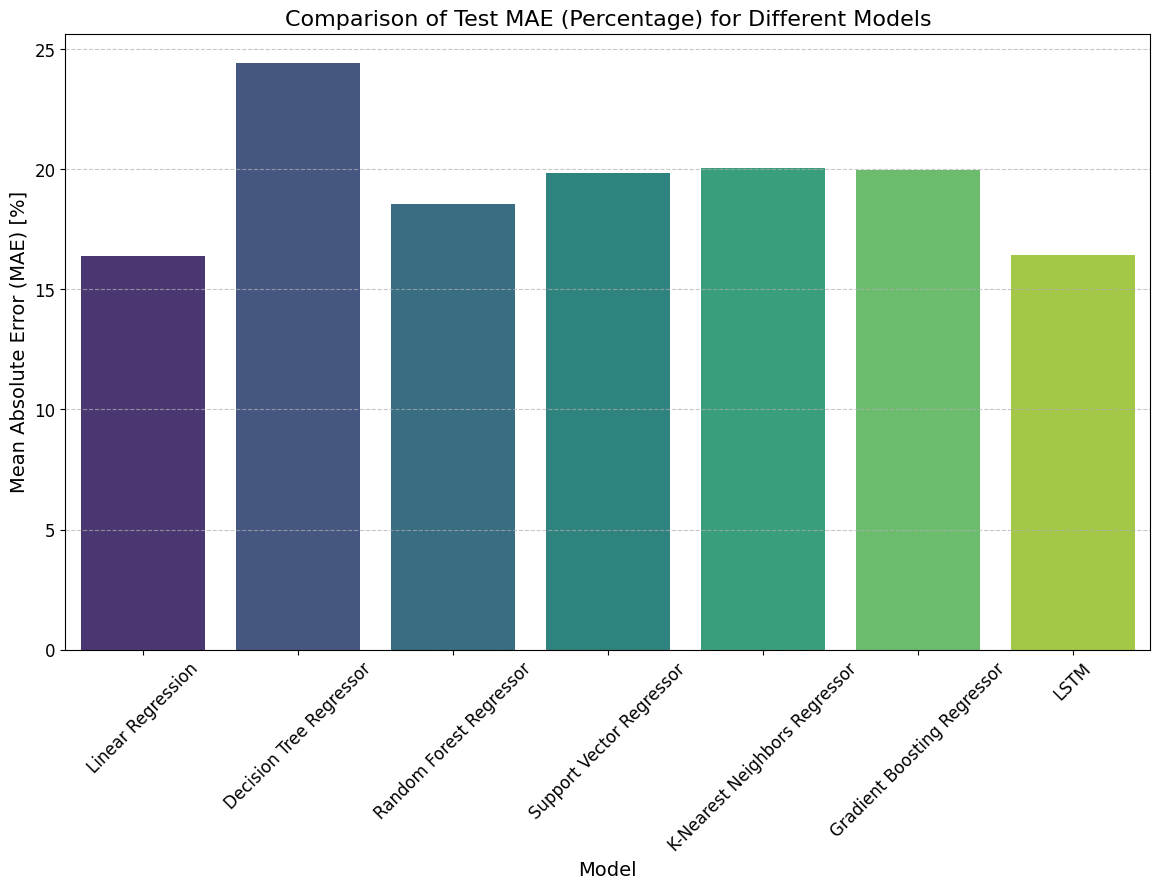

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from keras.models import Sequential
from keras.layers import LSTM, Dense

# بارگذاری داده‌ها از فایل اکسل
data = pd.read_excel('/content/DATA 3.xlsx')

# نمایش اطلاعات ابتدایی از داده‌ها
print("Initial data information:")
print(data.info())

# نمایش اولین سطرهای داده‌ها
print("\nFirst rows of data:")
print(data.head())

# نمایش خلاصه آماری از داده‌ها
print("\nStatistical summary of data:")
print(data['data'].describe())

# تولید داده‌های نرمال و اضافه کردن به داده‌های اصلی
data_normal = stats.norm.rvs(size=98, loc=338.519231, scale=171.356467)
data_normal = [int(data) for data in data_normal]
data_normal = [abs(data) for data in data_normal]

da = np.array(data['data'])
da = da[~np.isnan(da)]
ds = np.append(data_normal, da)
data['data'] = ds

# نمایش توصیف داده‌ها پس از ترکیب
print(data['data'].describe())

# حداکثر مقدار داده‌ها برای محاسبه درصد
max_data_value = data['data'].max()

# نرمال‌سازی داده‌ها
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data['data'].values.reshape(-1, 1))

# تقسیم داده‌ها به مجموعه‌های آموزش و تست
train_size = int(len(scaled_data) * 0.8)
train_data, test_data = scaled_data[:train_size], scaled_data[train_size:]

# ایجاد داده‌های ورودی برای مدل LSTM
def create_dataset(data, time_step=1):
    X, Y = [], []
    for i in range(len(data) - time_step - 1):
        a = data[i:(i + time_step), 0]
        X.append(a)
        Y.append(data[i + time_step, 0])
    return np.array(X), np.array(Y)

time_step = 10
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

# تغییر شکل ورودی‌ها برای مدل LSTM [نمونه‌ها، زمان‌پله‌ها، ویژگی‌ها]
X_train_lstm = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_lstm = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# ساخت مدل LSTM
model_lstm = Sequential()
model_lstm.add(LSTM(50, return_sequences=True, input_shape=(time_step, 1)))
model_lstm.add(LSTM(50, return_sequences=False))
model_lstm.add(Dense(1))
model_lstm.compile(optimizer='adam', loss='mean_squared_error')
model_lstm.fit(X_train_lstm, y_train, epochs=50, batch_size=1, verbose=1)

# پیش‌بینی با استفاده از مدل LSTM
train_predict_lstm = model_lstm.predict(X_train_lstm)
test_predict_lstm = model_lstm.predict(X_test_lstm)

# بازگرداندن مقادیر به مقیاس اصلی
train_predict_lstm = scaler.inverse_transform(train_predict_lstm)
test_predict_lstm = scaler.inverse_transform(test_predict_lstm)
y_train_inv = scaler.inverse_transform(y_train.reshape(-1, 1))
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))

# محاسبه خطاهای مدل LSTM
mae_train_lstm = mean_absolute_error(y_train_inv, train_predict_lstm)
mae_test_lstm = mean_absolute_error(y_test_inv, test_predict_lstm)

# محاسبه خطاهای به صورت درصد
mae_train_lstm_percent = (mae_train_lstm / max_data_value) * 100
mae_test_lstm_percent = (mae_test_lstm / max_data_value) * 100

# مدل‌های دیگر
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree Regressor': DecisionTreeRegressor(),
    'Random Forest Regressor': RandomForestRegressor(),
    'Support Vector Regressor': SVR(),
    'K-Nearest Neighbors Regressor': KNeighborsRegressor(),
    'Gradient Boosting Regressor': GradientBoostingRegressor()
}

results = {}

for name, model in models.items():
    X_train_flat = X_train.reshape(X_train.shape[0], -1)
    X_test_flat = X_test.reshape(X_test.shape[0], -1)
    model.fit(X_train_flat, y_train)
    y_pred_train = model.predict(X_train_flat)
    y_pred_test = model.predict(X_test_flat)

    y_pred_train = scaler.inverse_transform(y_pred_train.reshape(-1, 1))
    y_pred_test = scaler.inverse_transform(y_pred_test.reshape(-1, 1))

    mae_train = mean_absolute_error(y_train_inv, y_pred_train)
    mae_test = mean_absolute_error(y_test_inv, y_pred_test)

    # محاسبه خطاهای به صورت درصد
    mae_train_percent = (mae_train / max_data_value) * 100
    mae_test_percent = (mae_test / max_data_value) * 100

    results[name] = {
        'Train MAE (%)': mae_train_percent,
        'Test MAE (%)': mae_test_percent
    }

# افزودن نتایج مدل LSTM به نتایج دیگر مدل‌ها
results['LSTM'] = {
    'Train MAE (%)': mae_train_lstm_percent,
    'Test MAE (%)': mae_test_lstm_percent
}

# نمایش نتایج
for name, metrics in results.items():
    print(f"\n{name}:")
    for metric_name, value in metrics.items():
        print(f"{metric_name}: {value:.2f}%")

# مقایسه خطاهای همه مدل‌ها در یک نمودار

# استخراج نام مدل‌ها و مقادیر MAE درصدی
model_names = list(results.keys())
test_mae_values_percent = [metrics['Test MAE (%)'] for metrics in results.values()]

# ترسیم نمودار MAE درصدی برای مدل‌های مختلف با استفاده از Seaborn
plt.figure(figsize=(14, 8))
sns.barplot(x=model_names, y=test_mae_values_percent, palette='viridis')
plt.title('Comparison of Test MAE (Percentage) for Different Models', fontsize=16)
plt.xlabel('Model', fontsize=14)
plt.ylabel('Mean Absolute Error (MAE) [%]', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()